# ADM - HW2



In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df_locations = pd.read_csv('instagram_locations.csv', delimiter = '\t')

In [3]:
df_profiles = pd.read_csv('instagram_profiles.csv', delimiter = '\t')

## Research questions

### RQ1 - Exploratory Analysis

##### Data_Locations

In [4]:
df_locations.head()

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
0,719981,110296492939207,"Playa de Daimuz - Valencia, España",NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,-0.139475,38.974391,daimuzplaya,playa-de-daimuz-valencia-espana,https://es.wikipedia.org/wiki/Daimuz,2019-05-29 01:21:29.987
1,719983,274391278,Nová Vieska,NaN,NaN,Nová Vieska,NaN,SK,NaN,True,...,Kis-Újfalu,kis-ujfalu,SK,Slovakia,18.466667,47.866667,NaN,nova-vieska,NaN,2019-05-29 01:21:38.037
2,719985,148885595789195,Everest Today,Himalayas,+977,"Kathmandu, Nepal",NaN,NP,NaN,False,...,Pasupati,pasupati,NP,Nepal,85.330150,27.701960,EverestToday,everest-today,NaN,2019-05-29 01:21:46.295
3,719987,263258277,BULAC - Bibliothèque universitaire des langues...,"65, rue des Grands-Moulins",75013,"Paris, France",NaN,FR,01 81 69 18 00,False,...,13ème Arrondissement Paris,13eme-arrondissement-paris,FR,France,2.375995,48.827240,BULAC.Paris,bulac-bibliotheque-universitaire-des-langues-e...,www.bulac.fr,2019-05-29 01:21:54.355
4,326443,406147529857708,ABC Cable Networks Group,3800 W Alameda Ave,91505,"Burbank, California",NaN,US,(818) 569-7500,False,...,NaN,NaN,NaN,NaN,-118.341864,34.153265,NaN,abc-cable-networks-group,NaN,2019-04-02 15:22:55.703


In [5]:
df_locations.shape

(1022658, 23)

In [6]:
df_locations.columns

Index(['sid', 'id', 'name', 'street', 'zip', 'city', 'region', 'cd', 'phone',
       'aj_exact_city_match', 'aj_exact_country_match', 'blurb', 'dir_city_id',
       'dir_city_name', 'dir_city_slug', 'dir_country_id', 'dir_country_name',
       'lat', 'lng', 'primary_alias_on_fb', 'slug', 'website', 'cts'],
      dtype='object')

In [7]:
df_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022658 entries, 0 to 1022657
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   sid                     1022658 non-null  int64  
 1   id                      1022658 non-null  int64  
 2   name                    1022658 non-null  object 
 3   street                  715704 non-null   object 
 4   zip                     715579 non-null   object 
 5   city                    937166 non-null   object 
 6   region                  1760 non-null     object 
 7   cd                      939010 non-null   object 
 8   phone                   601688 non-null   object 
 9   aj_exact_city_match     1000510 non-null  object 
 10  aj_exact_country_match  1000510 non-null  object 
 11  blurb                   406705 non-null   object 
 12  dir_city_id             495698 non-null   object 
 13  dir_city_name           495698 non-null   object 
 14  di

In [8]:
# check for NaN values
df_locations.isna().sum()

sid                             0
id                              0
name                            0
street                     306954
zip                        307079
city                        85492
region                    1020898
cd                          83648
phone                      420970
aj_exact_city_match         22148
aj_exact_country_match      22148
blurb                      615953
dir_city_id                526960
dir_city_name              526960
dir_city_slug              527437
dir_country_id             527030
dir_country_name           526960
lat                          6163
lng                          6163
primary_alias_on_fb        597127
slug                        80990
website                    399396
cts                             0
dtype: int64

In [9]:
# check the percentage of missing values for each column
df_locations.isnull().sum() / df_locations.shape[0] * 100

sid                        0.000000
id                         0.000000
name                       0.000000
street                    30.015313
zip                       30.027536
city                       8.359784
region                    99.827899
cd                         8.179470
phone                     41.164299
aj_exact_city_match        2.165729
aj_exact_country_match     2.165729
blurb                     60.230595
dir_city_id               51.528468
dir_city_name             51.528468
dir_city_slug             51.575111
dir_country_id            51.535313
dir_country_name          51.528468
lat                        0.602645
lng                        0.602645
primary_alias_on_fb       58.389706
slug                       7.919559
website                   39.054699
cts                        0.000000
dtype: float64

We can see that for some of the columns more than half of the observations have NaN values. For example, 'region' has 99.8% missing values. Therefore, we can drop this feature when analyzing the dataset.

'blurb', 'dir_city_id', 'dir_city_name', 'dir_city_slug', 'dir_country_id', 'dir_country_name', 'primary_alias_on_fb' have around half of the observations missing. => We can further analyze those features and decide whether they are important and whether we should include them or drop them in our analysis.

In [10]:
# fill in the missing values with "" for some of the columns (cols that we might need when analyzing the data)

df_locations[['street', 'zip', 'city', 'phone', 'dir_city_id', 'dir_city_name', 'dir_city_slug', 'dir_country_id', 'dir_country_name',
       'lat', 'lng', 'primary_alias_on_fb', 'website']] = df_locations[['street', 'zip', 'city', 'phone', 'dir_city_id', 'dir_city_name', 'dir_city_slug', 'dir_country_id', 'dir_country_name',
       'lat', 'lng', 'primary_alias_on_fb', 'website']].fillna(value = "")


In [11]:
# check for NaN values
df_locations.isna().sum()

sid                             0
id                              0
name                            0
street                          0
zip                             0
city                            0
region                    1020898
cd                          83648
phone                           0
aj_exact_city_match         22148
aj_exact_country_match      22148
blurb                      615953
dir_city_id                     0
dir_city_name                   0
dir_city_slug                   0
dir_country_id                  0
dir_country_name                0
lat                             0
lng                             0
primary_alias_on_fb             0
slug                        80990
website                         0
cts                             0
dtype: int64

In [12]:
# check for duplicates
df_locations.duplicated().sum()

0

In [13]:
# convert 'cts' to a Datetime format
df_locations.cts = pd.to_datetime(df_locations.cts)

In [14]:
# change the type of the variables
df_locations.sid = df_locations.sid.astype('int')
df_locations.id = df_locations.id.astype('int')
df_locations.name = df_locations.name.astype('str')
df_locations.street = df_locations.street.astype('str')
df_locations.zip = df_locations.zip.astype('str')
df_locations.city = df_locations.city.astype('str')
df_locations.cd = df_locations.cd.astype('str')
df_locations.phone = df_locations.phone.astype('str')
df_locations.dir_city_id = df_locations.dir_city_id.astype('str')
df_locations.dir_city_name = df_locations.dir_city_name.astype('str')
df_locations.dir_city_slug = df_locations.dir_city_slug.astype('str')
df_locations.dir_country_id = df_locations.dir_country_id.astype('str')
df_locations.dir_country_name = df_locations.dir_country_name.astype('str')
df_locations.website = df_locations.website.astype('str')

In [15]:
# number of unique cities (excluding the empty '' string)
len(df_locations.dir_city_id.unique()) - 1

121685

In [16]:
# number of unique countries (excluding the empty '' string)
len(df_locations.dir_country_id.unique()) - 1

234

#### Data_profiles

In [17]:
df_profiles.head(3)

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,4184446,4.721050e+09,jphillip033,John Pierce,"""Document Everything Always""",250.0,146.0,170.0,NaN,2019-08-01 14:38:55.394 -0400,False
1,4184457,5.905830e+08,mama_haas,Deanna,Trying to enjoy the simple things in life. Kni...,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,4184460,1.074147e+09,yellowlightbreen,Eliza Gray,Maine is for Lovers,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False


In [18]:
df_profiles.shape

(4509586, 11)

In [19]:
df_profiles.columns

Index(['sid', 'profile_id', 'profile_name', 'firstname_lastname',
       'description', 'following', 'followers', 'n_posts', 'url', 'cts',
       'is_business_account'],
      dtype='object')

In [20]:
# check for duplicates
df_profiles.duplicated().sum()

0

There are no duplicates based on all features, including the "sid" feature.

In [21]:
# check for duplicates while ignoring the index feature ("sid" = sequence id)
n_duplicates = df_profiles.drop(labels=["sid"], axis=1).duplicated().sum()
print(f"There are {n_duplicates} duplicates in the dataset.")

There are 338 duplicates in the dataset.


In [22]:
ids = df_profiles['profile_id']
df_profiles[ids.isin(ids[ids.duplicated()])].sort_values("profile_id").head(10)

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
3969686,3644732,272366.0,rkrkrk,R̸K̸,NaN,NaN,NaN,NaN,NaN,2019-06-29 18:00:18.777 -0400,NaN
3969875,3644730,272366.0,rkrkrk,R̸K̸,NaN,NaN,NaN,NaN,NaN,2019-06-29 18:00:18.714 -0400,NaN
637382,348513,473929.0,arthamey,Arthamey,NaN,NaN,NaN,NaN,NaN,NaN,NaN
637327,348514,473929.0,arthamey,Arthamey,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4013390,3680065,834947.0,topscottphoto,T O P H E R S C O T T 📸✨,👨🏻‍💻 Photographer / CEO @tycoonstudionyc \n🗽Ba...,499.0,6371.0,329.0,www.topherscott.nyc,2019-07-02 04:50:11.913 -0400,True
4013321,3680068,834947.0,topscottphoto,T O P H E R S C O T T 📸✨,👨🏻‍💻 Photographer / CEO @tycoonstudionyc \n🗽Ba...,499.0,6371.0,329.0,www.topherscott.nyc,2019-07-02 04:50:11.722 -0400,True
4013248,3680067,834947.0,topscottphoto,T O P H E R S C O T T 📸✨,👨🏻‍💻 Photographer / CEO @tycoonstudionyc \n🗽Ba...,499.0,6371.0,329.0,www.topherscott.nyc,2019-07-02 04:50:11.940 -0400,True
2859937,380036,859551.0,gunnicool,Gunnar Sigurdur Zöega Gudmundsson,NaN,NaN,NaN,NaN,NaN,NaN,NaN
728346,380039,859551.0,gunnicool,Gunnar Sigurdur Zöega Gudmundsson,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2871629,337878,977359.0,chuckdafonk,Charlie Fishman,Please BUY our new EP with ⭐️ @dolettemcdonald...,5460.0,2363.0,11848.0,bit.ly/buy_zimbra,NaN,False


Based on the feature "sid", which is Sequence ID, there are no duplicated observations. However, if we drop this variable, we can see that there are 338 duplicates in our dataset. Which means that some of the profiles are recorded several times. 

It might be a good idea to drop the duplicates before continuing with any further analysis.

If we look at the table above, the one with the duplicates, we can see that the observations that have the same "profile id" also have the same values for the rest of the variables, except for feature "cts" (timestamp when the profile was visited).
Given that the rest of the features are the same, we can ignore the differences in the variable "cts" and keep only one of the records for the duplicated profiles.

In [23]:
df_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4509586 entries, 0 to 4509585
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   sid                  int64  
 1   profile_id           float64
 2   profile_name         object 
 3   firstname_lastname   object 
 4   description          object 
 5   following            float64
 6   followers            float64
 7   n_posts              float64
 8   url                  object 
 9   cts                  object 
 10  is_business_account  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 378.5+ MB


In [24]:
#check for NaN values
df_profiles.isna().sum()

sid                          0
profile_id               32447
profile_name                 0
firstname_lastname      288465
description            2055996
following              1056815
followers              1056815
n_posts                1056815
url                    3639312
cts                     438488
is_business_account    1064263
dtype: int64

In [25]:
# check the percentage of missing values for each column
df_profiles.isnull().sum() / df_profiles.shape[0] * 100

sid                     0.000000
profile_id              0.719512
profile_name            0.000000
firstname_lastname      6.396707
description            45.591680
following              23.434856
followers              23.434856
n_posts                23.434856
url                    80.701687
cts                     9.723465
is_business_account    23.600016
dtype: float64

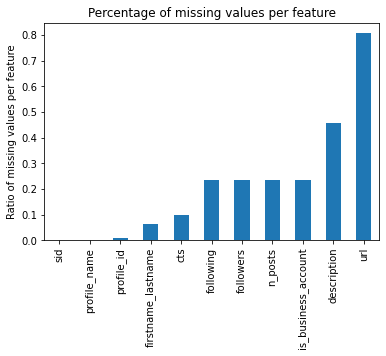

In [26]:
df_profiles.isna().mean().sort_values().plot(
    kind="bar", figsize=(6, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

The variables 'url' and 'description' have missing values for around half or more than half of the observations. Therefore, they might not be that important and we could drop them when analyzing the dataset. 

In [27]:
# fill in the missing values
df_profiles.firstname_lastname.fillna("", inplace=True)
df_profiles.description.fillna("", inplace=True)
df_profiles.following.fillna(0, inplace=True)
df_profiles.followers.fillna(0, inplace=True)
df_profiles.n_posts.fillna(0, inplace=True)
df_profiles.url.fillna("", inplace=True)
df_profiles.is_business_account.fillna(False, inplace=True)
df_profiles.cts.fillna("", inplace=True)

In [28]:
# convert 'cts' to a Datetime format
df_profiles.cts = pd.to_datetime(df_profiles.cts)

In [28]:
# check how many of the accounts are business accounts
df_profiles.is_business_account.value_counts()

False    3654332
True      855254
Name: is_business_account, dtype: int64

In [29]:
# check how many of the accounts are business accounts
df_profiles.is_business_account.value_counts() / df_profiles.shape[0] * 100

False    81.034756
True     18.965244
Name: is_business_account, dtype: float64

In [30]:
print(f"Max number of followers = {df_profiles['followers'].max()}")
print(f"Min number of followers = {df_profiles['followers'].min()}")

Max number of followers = 285457645.0
Min number of followers = 0.0


In [31]:
df_profiles.sort_values(by='followers', ascending=False).head()

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
2880218,336492,2.502532e+07,instagram,Instagram,Bringing you closer to the people and things y...,226.0,285457645.0,5760.0,help.instagram.com,,False
2582507,371414,3.416684e+06,victoriassecret,Victoria's Secret,Confidence is sexy. #wearitdaily,549.0,65269440.0,7355.0,like2b.uy/victoriassecret,,True
3820939,337097,2.082449e+07,nba,NBA,"30 teams, 1 🏆\n👟: @nbakicks \n📽: @nbahistory \...",817.0,35339708.0,28816.0,nba.app.link/js6X7SVaxT,,True
701965,330376,1.876191e+08,louisvuitton,Louis Vuitton Official,The official Instagram account of Louis Vuitton.,5.0,30689316.0,3352.0,on.louisvuitton.com/Like2Buy,,True
2414951,292359,2.125507e+09,buzzfeedtasty,Tasty,"Recipes that will make you say ""oh yes!""\n👇 Cl...",298.0,30246783.0,2791.0,tasty.co/linkinbio,,True


In [32]:
print(f"Max number of following = {df_profiles['following'].max()}")
print(f"Min number of following = {df_profiles['following'].min()}")

Max number of following = 4191080.0
Min number of following = 0.0


In [33]:
df_profiles.sort_values(by='following', ascending=False).head()

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
2401691,2440311,3176999.0,izdato_eng,Artem Shurgalsky ,"Moscow, Russia 🇷🇺\nJoin my #sunsetters club.\n...",4191080.0,681313.0,1870.0,facebook.com/izdato,2019-04-08 11:46:12.622 -0400,True
2401140,2498871,7276037.0,photogeekdom,Photography Tips & Fun Facts,"Your mobile magazine of photography tips, inte...",4158587.0,660481.0,208.0,"Followed by gemibears, toppeopleworld, million...",2019-04-08 15:23:31.503 -0400,False
2897280,2440237,247703075.0,toppeopleworld,TOPPEOPLEWORLD ✪,Screenshot our page and shout us out for a cha...,3563636.0,674080.0,2851.0,,2019-04-08 11:45:55.405 -0400,False
2401650,2440324,30770059.0,eyemediaa,Inspiration Blog,📧 wowinstamind@yandex.ru,3460824.0,821666.0,2119.0,"Followed by idealfashionistas, katrochelle, ep...",2019-04-08 11:46:16.451 -0400,False
3570142,2440213,251532689.0,igtoppicture,dm us for promo,Please dm us for marketing / credit,3404918.0,734627.0,387.0,www.loveindianhair.com,2019-04-08 11:45:50.517 -0400,False


In [34]:
print(f"Max number of number of posts = {df_profiles['n_posts'].max()}")
print(f"Min number of number of posts = {df_profiles['n_posts'].min()}")

Max number of number of posts = 183730.0
Min number of number of posts = 0.0


In [35]:
df_profiles.sort_values(by='n_posts', ascending=False).head()

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
3990313,3661552,1.996648e+08,jasem33312,jasem33312,,2.0,82049.0,183730.0,,2019-06-30 19:14:19.780 -0400,False
2571453,3288809,8.563367e+09,koenigpic,Helperwait Studio,Веб сайты от идеи до запуска,4538.0,675.0,142428.0,vk.com/ru.helperwait,2019-05-07 00:14:06.799 -0400,True
4338921,3970193,1.273455e+09,rudyanto62,Rudyanto 王耀祝,,164.0,1693.0,126340.0,,2019-07-15 10:00:51.171 -0400,False
3942129,3621669,9.813508e+06,hometown_ni,AngelsCowboysLakers,All about live & let live. Peace & Harmony. La...,7488.0,1755.0,125220.0,,2019-06-27 02:49:38.140 -0400,False
4219642,3851869,1.607309e+09,dwfitfiber_thailand,เห็นผลตั้งแต่เซ็ตแรกท้าลอง,✿รับตัวแทนรายได้ดีมาก\n🏧 KTB l SCB l KBANK | B...,7490.0,44951.0,117262.0,bit.ly/2GdIYJl,2019-07-13 02:10:07.317 -0400,True


#### Data_posts

In [37]:
df_types = pd.read_csv('instagram_posts.csv', delimiter="\t", usecols = ['post_id','post_type'], low_memory = True)

In [38]:
# number of posts that include only a photo, only a video, or both
# 1 - Photo, 2 - Video, 3 - multy
df_types['post_type'].value_counts()

1    41534486
2     1134768
3       40943
Name: post_type, dtype: int64

We can see that there are 41534486 posts that include only a photo, 1134768 posts that include only a video, and 40943 posts that include both photos and videos.

In [39]:
# max and min number of likes
df_likes = pd.read_csv('instagram_posts.csv', delimiter="\t", usecols = ['post_id','numbr_likes'], low_memory = True)
print("Max number of likes: ", df_likes['numbr_likes'].max())
print("Min number of likes: ", df_likes['numbr_likes'].min())

Max number of likes:  8822952.0
Min number of likes:  0.0


In [40]:
# max and min number of comments

df_comm = pd.read_csv('instagram_posts.csv', delimiter="\t", usecols = ['post_id','number_comments'], low_memory = True)
print("Max number of likes: ", df_comm['number_comments'].max())
print("Min number of likes: ", df_comm['number_comments'].min())

Max number of likes:  488953.0
Min number of likes:  0.0


In [41]:
df_P = pd.read_csv('instagram_posts.csv', delimiter="\t", usecols = ['profile_id','numbr_likes','number_comments'], low_memory = True)

In [46]:
df_P_group = df_P.groupby('profile_id').agg(likes = ("numbr_likes",'sum'),
                                            comm = ("number_comments", 'sum')).reset_index()
df_P_group.sort_values(by = 'likes', ascending = False)

,profile_id,likes,comm
1249837,4.906778e+07,43188761.0,348145.0
751776,2.502532e+07,29864166.0,225050.0
6780077,2.153681e+09,26067462.0,329627.0
5091954,1.292593e+09,24865710.0,571813.0
275617,8.443283e+06,21784365.0,117612.0
...,...,...,...
10310003,7.918710e+09,0.0,0.0
5044323,1.271666e+09,0.0,0.0
11462105,1.169097e+10,0.0,0.0
6850111,2.205947e+09,0.0,0.0


### RQ2

#### Plot the number of posts for each profile in descending order.

In [36]:
profiles_nposts = df_profiles[['profile_id','n_posts']]
profiles_nposts.sort_values(by='n_posts', ascending=False)

,profile_id,n_posts
3990313,1.996648e+08,183730.0
2571453,8.563367e+09,142428.0
4338921,1.273455e+09,126340.0
3942129,9.813508e+06,125220.0
4219642,1.607309e+09,117262.0
...,...,...
2300812,3.864219e+09,0.0
2300811,5.007520e+09,0.0
2300810,5.430227e+09,0.0
2300809,6.584424e+06,0.0


#### What posts have the highest number of "likes"?

In [51]:
df_posts_likes = pd.read_csv('instagram_posts.csv', delimiter="\t", usecols = ['post_id','numbr_likes', 'post_type'], low_memory = True)

In [52]:
df_posts_likes.sort_values(by='numbr_likes', ascending=False)

,post_id,post_type,numbr_likes
19624085,Bt3yaXmAM0d,1,8822952.0
19623988,BuwffB7g8cK,1,5447066.0
19624082,Buc1gyZAaMQ,1,5116398.0
19623986,BvcukE8AMuG,1,4271466.0
39701024,BqSLFVBFLfq,1,4264745.0
...,...,...,...
19917549,BiJ9ySvHWqF,1,NaN
19917550,BiC7zI5nkuo,1,NaN
19917558,BiAtz-QHQvE,1,NaN
19917770,BiwpCvHH2_u,1,NaN


From the table above, we can see that the post with post_id = Bt3yaXmAM0d has the highest number of likes (likes = 8822952.0). The type of the post is 1 which which means that the post is a Photo.

We can also see that the top 5 posts (with highest number of likes) are also of type 1 (photo).

#### What posts have the most and the least number of comments?

In [53]:
df_posts_comm = pd.read_csv('instagram_posts.csv', delimiter="\t", usecols = ['post_id','number_comments','post_type'], low_memory = True)

In [54]:
df_posts_comm.sort_values(by='number_comments', ascending=False)

,post_id,post_type,number_comments
41873060,Bx2sPAjHviO,1,488953.0
12164781,BuGjhWAhAW5,1,313997.0
33261751,BJ-rkpTgn1N,1,257488.0
11149127,BMtisIxjhtT,1,214365.0
9383817,BzOOWj3DfZK,1,189888.0
...,...,...,...
19917549,BiJ9ySvHWqF,1,NaN
19917550,BiC7zI5nkuo,1,NaN
19917558,BiAtz-QHQvE,1,NaN
19917770,BiwpCvHH2_u,1,NaN


The post with max number of comments (488953.0) is the post with post_id = Bx2sPAjHviO and post_type = 1 (photo).

In [55]:
# min number of comments
df_posts_comm[df_posts_comm['number_comments'] == df_posts_comm['number_comments'].min()]

,post_id,post_type,number_comments
0,BXdjjUlgcgq,2,0.0
2,BRgkjcXFp3Q,1,0.0
3,BKTKeNhjEA7,1,0.0
4,8-NQrvoYLX,1,0.0
11,Bx-ptmpinBs,1,0.0
...,...,...,...
42710190,BpeRbppFQ2l,1,0.0
42710191,Bdx3o7WDypu,1,0.0
42710192,BcpWMWGBfxh,1,0.0
42710193,Ba6LZWwlCl8,1,0.0


There are a lot of posts that don't have any comments.

In [56]:
df_posts_comm[df_posts_comm['number_comments'] == 1.0]

,post_id,post_type,number_comments
1,BVg0pbolYBC,1,1.0
14,Bx2ygKmCC2J,1,1.0
15,Bx1vAhRo-Os,1,1.0
20,BtnY11QlBB4,1,1.0
21,BvCI5yKhkvT,1,1.0
...,...,...,...
42710177,BmNSg2ih5ex,1,1.0
42710180,BgS2rd4BozM,1,1.0
42710181,Bc6jrZIHttD,1,1.0
42710184,BfMOP6olxcg,2,1.0


We can see that there are also a lot of posts that have only 1 comment. There is not a single observation that has the smallest value for the number of comments. Smallest number of comments = 0.

#### How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.

In [57]:
df_posts_locations = pd.read_csv('instagram_posts.csv', delimiter="\t", usecols = ['post_id', 'location_id'], low_memory = True)
df_posts_locations.head()

,post_id,location_id
0,BXdjjUlgcgq,1.022366e+15
1,BVg0pbolYBC,4.574268e+14
2,BRgkjcXFp3Q,4.574268e+14
3,BKTKeNhjEA7,4.574268e+14
4,8-NQrvoYLX,4.574268e+14


In [58]:
df_posts_locations.shape

(42710197, 2)

In [61]:
no_loc = df_posts_locations['location_id'].isna().sum()
print("Number of posts that do not have a tagged location: ", no_loc)

Number of posts that do not have a tagged location:  12972772


In [62]:
with_loc = df_posts_locations['location_id'].notna().sum()
print("Number of posts that have a tagged location: ", with_loc)

Number of posts that have a tagged location:  29737425


In [63]:
data = {'has_location': [0,1], 'number_posts': [no_loc,with_loc]}  
df_small = pd.DataFrame(data)
df_small

,has_location,number_posts
0,0,12972772
1,1,29737425


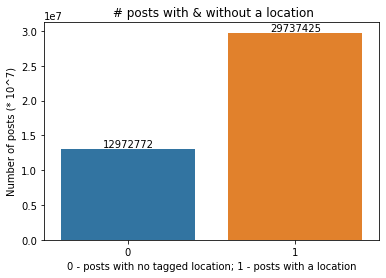

In [64]:
# bar chart displaying the number of posts that have & don't have a tagged location

plots = sns.barplot(x="has_location", y="number_posts", data=df_small)
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
    
plt.title(" # posts with & without a location")
plt.xlabel("0 - posts with no tagged location; 1 - posts with a location")
plt.ylabel("Number of posts (* 10^7)")
plt.show()

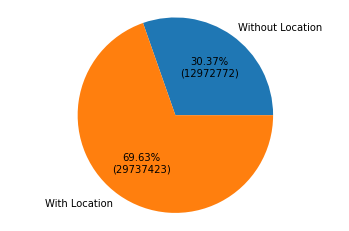

In [65]:
labels = 'Without Location', 'With Location'

# Creating autocpt arguments
def func(pct, values):
    absolute = int(pct / 100.*np.sum(values))
    return "{:.2f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots()
ax.pie(df_small['number_posts'], labels=labels, autopct = lambda pct: func(pct, df_small['number_posts']))
ax.axis('equal')

plt.show()

From the plots above we can see that the posts that include a tagged location (29737425) are as twice as many as the posts that do not include a tagged location (12972772).

#### How many posts include only photos? How many also have videos?

In [67]:
# post_type = 1 - Photo, 2 - Video, 3 - multy (both photo and video)

# df_types --> 'instagram_posts.csv' --> features 'post_id', 'post_type'

In [70]:
print('Number of posts that include only photos: ', df_types[df_types['post_type']==1].shape[0])

Number of posts that include only photos:  41534486


In [71]:
# posts that also include videos (3 - multy = have both photos and videos)
print('Number of posts that also include videos: ', df_types[df_types['post_type']==3].shape[0])

Number of posts that also include videos:  40943


#### What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage?

Percentage of business and non-business accounts (before filling in the missing values for this variable with False)

False    57.434740

True     18.965244

In [72]:
# percentage of business and non-business accounts (afetr filling in the missing values for this variable with False)
df_profiles.is_business_account.value_counts() / df_profiles.shape[0] * 100

False    81.034756
True     18.965244
Name: is_business_account, dtype: float64

We can see that there are a lot more non-business accounts. We expected to see that because there are more individuals who have instagram accounts than companies & small businesses.

Even though there are individuals who have business accounts, their number is not that large and those people usually have such accounts because they either have their own business or promote other businesses.

At the same time, there is a large amount of people who use instagram as just another social media, for example, to post photos and videos, to connect with friends, etc. In that case a non-business account is sufficient.

### RQ3

#### What is the most common time in which users publish their posts?

In [73]:
df_posts_times = pd.read_csv('instagram_posts.csv', delimiter="\t", usecols = ['post_id', 'cts'], low_memory = True)

In [74]:
# convert 'cts' to a Datetime format
df_posts_times.cts = pd.to_datetime(df_posts_times.cts)

In [75]:
# create a new column for the hours
df_posts_times['hour'] = df_posts_times.cts.dt.hour

In [76]:
#the most common time in which users publish their posts
df_posts_times['hour'].value_counts() 

19.0    2499758
20.0    2495269
18.0    2486381
17.0    2423768
21.0    2414932
16.0    2341052
15.0    2263009
22.0    2167378
14.0    2158976
13.0    2025569
12.0    1868544
23.0    1838215
11.0    1720602
10.0    1571222
0.0     1547036
9.0     1434724
1.0     1376147
2.0     1290434
8.0     1267423
3.0     1231644
4.0     1135290
7.0     1093280
5.0     1044289
6.0     1011923
Name: hour, dtype: int64

#### Create a function that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval.

In [80]:
# A function that receives a time intervals list as a parameter and returns
# a plot with the number of posts for each given interval

def plot_posts_time(time_intervals):
    time_results = {}
    for slot in time_slots:
        result = len(df_posts_times[(df_posts_times.hour >= slot[0]) & (df_posts_times.hour <= slot[1])])
        time_results[slot] = result
    
    # create a list of strings of the time intervals
    time_intervals_str = []
    for i in time_intervals:
        time_intervals_str.append(str(i))
    
    num_posts = list(time_results.values())
    plt.bar(range(len(time_results)), num_posts, tick_label = time_intervals_str)
    plt.title('Number of posts for each time interval')
    plt.xlabel('Time intervals')
    plt.ylabel('Number of posts')
    plt.show()
    
    return(time_results)

#### Use the function that you created in the previous literal to plot the number of posts between the following time intervals:

In [81]:
time_slots = [(6,10),(11,13),(14,16),(17,19),(20,23),(0,2),(3,5)]

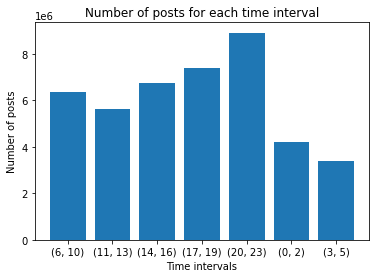

{(6, 10): 6378572,
 (11, 13): 5614715,
 (14, 16): 6763037,
 (17, 19): 7409907,
 (20, 23): 8915794,
 (0, 2): 4213617,
 (3, 5): 3411223}

In [82]:
plot_posts_time(time_slots)

We have used the function "dt.hour" which converts values of DateTime format to hours. Which means that that our intervals above are equavalent to:

06:00:00 - 10:59:59; 11:00:00 - 13:59:59, 14:00:00 - 16:59:59; 17:00:00 - 19:59:59; 
20:00:00 - 23:59:59; 00:00:00 - 02:59:59; 03:00:00 - 05:59:59

From above, we can see that the **5th time interval (20, 23) has the most number of posts**. It has 8915794 number of posts.

### RQ4

#### Write a function that, given a profile_id, will be able to return the posts that belong to the given profile_id.

In [37]:
profileposts = pd.read_csv('instagram_posts.csv', delimiter = '\t', usecols=['post_id','profile_id'], low_memory = True)

In [38]:
# we are interested only in the profiles that are present in both the profiles and the posts datasets

# find all unique profile_ids
ids_unique = df_profiles['profile_id'].unique()

In [39]:
# data for the profiles that are present in both the profiles and the posts datasets
# features -- post id & profile id

profileposts_1 = profileposts[profileposts['profile_id'].isin(ids_unique)]

In [40]:
# function that returns the ids of the posts that belong to a given profile id
def findposts(prof):
    return list(profileposts[profileposts['profile_id']==prof]['post_id'])


In [41]:
# test the function with some id
findposts(df_profiles['profile_id'][0])

['B0nvWXnFBEx',
 'B0lHr6HF_od',
 'Bz5fUlwl6N1',
 'Bzo0MlIFhA6',
 'By5EP57lVmw',
 'BywSyM8lvhd',
 'ByuzQLWllNU',
 'Byh2ZdZlMcl',
 'ByWpTQ_FBtb',
 'ByWeIyqlcbw',
 'ByG4lJsFaX3',
 'Bx8u8qJFuMq',
 'BxQ0AJel41c',
 'BxQze6lFHdG',
 'BxQt4_7Fqeb']

In [42]:
# another version of the function
# function that returns all the info about the posts for a given profile id

def posts_for_profileID(profile_id):
    #set up an empty dataframe
    df_ID_posts = pd.DataFrame()

    chunksize = 10 ** 5

    #in each chunk, filter for the particular profile_id and merge the chunks into one dataframe
    for chunk in pd.read_csv('instagram_posts.csv', delimiter="\t", chunksize=chunksize):
        df_filtered = (chunk[(np.where(chunk['profile_id'] == profile_id, True, False))])
        df_ID_posts = pd.concat([df_ID_posts, df_filtered], ignore_index=True, )
   
    return df_ID_posts

In [43]:
# test the function with some id
posts_for_profileID(profile_id = 313429634)

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
0,28370933,-1,BRgkjcXFp3Q,313429634.0,4.574268e+14,2017-03-11 20:05:03.000,1,#meraviglia #incensi #the #candele #profumo #a...,9.0,0.0


#### Write another function that, given an input n (an integer), will return the posts that belong to the n top posted profiles (top n profiles that have posted the highest number of posts) that their data is available in the profile.csv using the previously written function.

In [44]:
# here we work with the dataset that contains only the users that are present in both datasets (profileposts_1)

In [45]:
# function that returns the ids of the top n users and the ids of their posts

def top_n_profiles(n):
    # group by the profile id and calculate the number of posts each profile has
    id_numposts = profileposts_1.groupby('profile_id').agg(numb_posts = ('post_id','count')).reset_index()

    # sort by the number of posts
    id_numposts = id_numposts.sort_values(by = 'numb_posts', ascending = False)

    # find the top n profiles that have posted the highest number of posts
    top_n_prof = id_numposts.head(n)
    
    # ids of the top n users
    ids = list(top_n_prof['profile_id'])
    
    # list where we will store the post ids of the top n users
    posts = []
    
    for i in ids:
        posts.append(findposts(i))

    return ids, posts

#### What is the average number of "likes" and "comments" of the top 10 profiles with the highest number of posts which their information is available in profile.csv?

In [46]:
# post ids for the top 10 profiles
top10_ids, top10_p = top_n_profiles(10)

In [47]:
df_likecom = pd.read_csv('instagram_posts.csv', delimiter='\t', usecols=['profile_id','numbr_likes','number_comments','cts'], low_memory=True)

In [48]:
# data only for the top 10 users
data_top10 = df_likecom[df_likecom['profile_id'].isin(top10_ids)]

In [49]:
for i in top10_ids:
    # average number of likes
    sum_likes = data_top10[data_top10['profile_id']==i]['numbr_likes'].sum()
    num_posts = data_top10[data_top10['profile_id']==i].shape[0]
    avg_likes = sum_likes / num_posts
    
    print("Avg #likes for user ", i, ": ", avg_likes)
    

Avg #likes for user  5421037289.0 :  10.373956594323873
Avg #likes for user  12878122053.0 :  2.174061433447099
Avg #likes for user  13478139882.0 :  3.5673249551166966
Avg #likes for user  12961349015.0 :  3.091254752851711
Avg #likes for user  5515448111.0 :  8.173333333333334
Avg #likes for user  2243212181.0 :  636.5022222222223
Avg #likes for user  4575459348.0 :  19.434895833333332
Avg #likes for user  10294138.0 :  3138.977900552486
Avg #likes for user  268209442.0 :  1931.7310924369747
Avg #likes for user  23650507.0 :  247.0231884057971


In [50]:
for i in top10_ids:
    # average number of likes
    sum_comm = data_top10[data_top10['profile_id']==i]['number_comments'].sum()
    num_posts = data_top10[data_top10['profile_id']==i].shape[0]
    avg_likes = sum_comm / num_posts
    
    print("Avg #comments for user ", i, ": ", avg_likes)
    

Avg #comments for user  5421037289.0 :  0.2637729549248748
Avg #comments for user  12878122053.0 :  0.11433447098976109
Avg #comments for user  13478139882.0 :  0.14721723518850988
Avg #comments for user  12961349015.0 :  0.09885931558935361
Avg #comments for user  5515448111.0 :  0.07333333333333333
Avg #comments for user  2243212181.0 :  15.488888888888889
Avg #comments for user  4575459348.0 :  0.018229166666666668
Avg #comments for user  10294138.0 :  111.06077348066299
Avg #comments for user  268209442.0 :  31.11484593837535
Avg #comments for user  23650507.0 :  7.959420289855072


#### Plot the number of posts that these top 10 profiles have sent on Instagram in the given interval in question RQ3. Interpret the resulting chart.

In [51]:
# convert 'cts' to a Datetime format
data_top10.cts = pd.to_datetime(data_top10.cts)

C:\Users\yoann\AppData\Local\Temp\ipykernel_10880\700628392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_top10.cts = pd.to_datetime(data_top10.cts)


In [52]:
# create a new column for the hours
data_top10['hour'] = data_top10.cts.dt.hour

C:\Users\yoann\AppData\Local\Temp\ipykernel_10880\563773545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_top10['hour'] = data_top10.cts.dt.hour


In [53]:
data_top10.head(3)

,profile_id,cts,numbr_likes,number_comments,hour
7436,4.575459e+09,2019-05-29 09:05:37,7.0,0.0,9
28906,2.243212e+09,2017-08-11 13:19:53,682.0,18.0,13
40126,1.029414e+07,2019-05-22 22:51:40,10014.0,93.0,22


In [54]:
# We can modify the function from RQ3 which plots the number of posts for each interval. We just change the dataset that is used.

# A function that receives a time intervals list as a parameter and returns
# a plot with the number of posts for each given interval

def plot_posts_times_top10(time_intervals):
    time_results = {}
    for slot in time_slots:
        result = len(data_top10[(data_top10.hour >= slot[0]) & (data_top10.hour <= slot[1])])
        time_results[slot] = result
    
    # create a list of strings of the time intervals
    time_intervals_str = []
    for i in time_intervals:
        time_intervals_str.append(str(i))
    
    num_posts = list(time_results.values())
    plt.bar(range(len(time_results)), num_posts, tick_label = time_intervals_str)
    plt.title('Number of posts for each time interval')
    plt.xlabel('Time intervals')
    plt.ylabel('Number of posts (in millions)')
    plt.show()
    
    return(time_results)

In [57]:
#time_slots = [(6,10),(11,13),(14,16),(17,19),(20,23),(0,2),(3,5)]

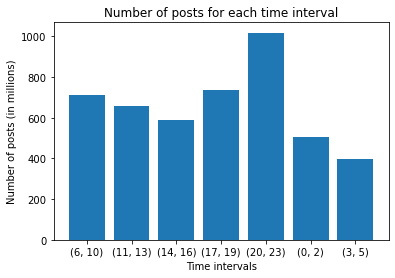

{(6, 10): 711,
 (11, 13): 657,
 (14, 16): 590,
 (17, 19): 738,
 (20, 23): 1018,
 (0, 2): 503,
 (3, 5): 399}

In [58]:
plot_posts_times_top10(time_slots)

### RQ5
The **most influential users** are the ones with the **highest number of “followers"**, you can now look more into their activity.

#### Plot the top 10 most popular users in terms of followers and their number of posts.

In [59]:
# sort by followers and display the top 10 users with their number of posts
df_prof_sort = df_profiles.sort_values(by='followers', ascending = False)
df_profiles_top10 = df_prof_sort.head(10)
df_profiles_top10 = df_profiles_top10[['profile_id',"followers",'n_posts']]
df_profiles_top10

,profile_id,followers,n_posts
2880218,2.502532e+07,285457645.0,5760.0
2582507,3.416684e+06,65269440.0,7355.0
3820939,2.082449e+07,35339708.0,28816.0
701965,1.876191e+08,30689316.0,3352.0
2414951,2.125507e+09,30246783.0,2791.0
2785241,4.968651e+08,29542143.0,990.0
333193,2.341008e+07,29176804.0,4566.0
3934581,2.423993e+07,29042823.0,4719.0
1311970,5.041706e+07,26476004.0,1311.0
1703764,9.070254e+08,26252169.0,1173.0


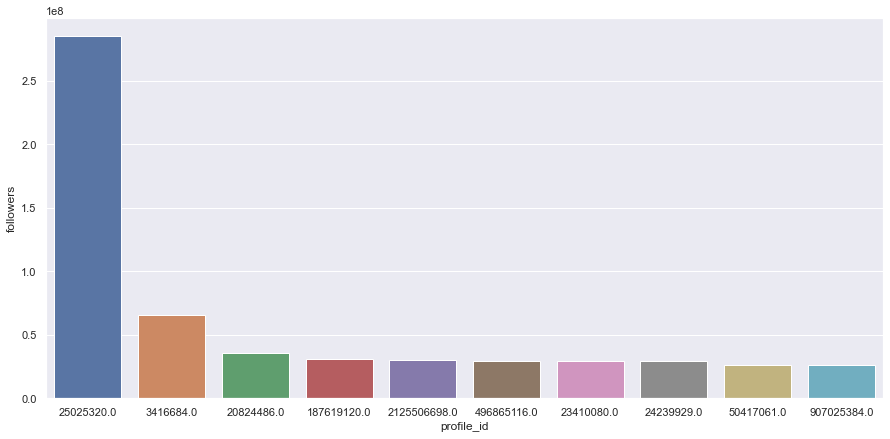

In [60]:
# bar chart showing the top 10 most influential users with their number of followers (sorted)
sns.set(rc={'figure.figsize':(15,7)})
nf = sns.barplot(data = df_profiles_top10, x="profile_id", y="followers", order=df_profiles_top10['profile_id'])

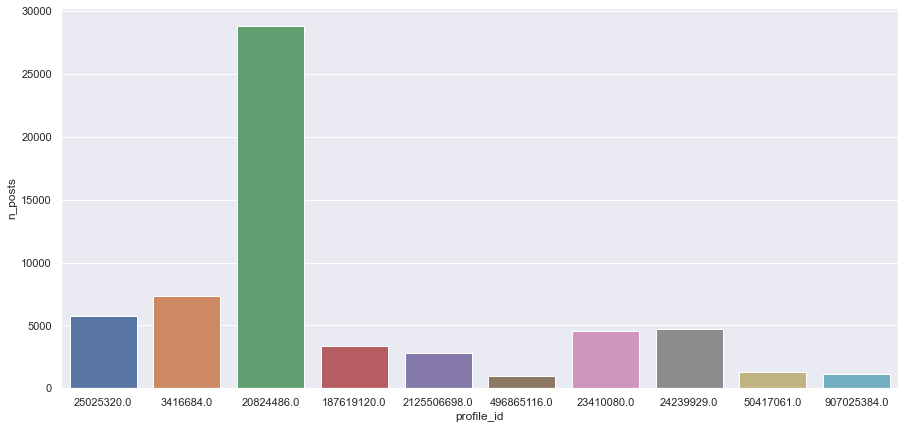

In [61]:
# bar chart showing the top 10 most influential users with their corresponding number of posts (sorted by # followers)
sns.set(rc = {'figure.figsize':(15,7)})
np = sns.barplot(data = df_profiles_top10, x="profile_id", y="n_posts", order = df_profiles_top10['profile_id'])

#### Who is the most influential user?


In [62]:
df_prof_sort.head(1)

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
2880218,336492,25025320.0,instagram,Instagram,Bringing you closer to the people and things y...,226.0,285457645.0,5760.0,help.instagram.com,,False


The most influential user is the user with profile_id 25025320.0, profile name "instagram". It has 285457645.0 followers and 5760.0 number of posts. The account is not a business account.

#### Have they posted anything with tagged locations? Extract the most frequent areas on their posts and plot the number of times each city has been visited.

In [63]:
# ids of top 10 most influential users 
ids = list(df_profiles_top10['profile_id'])
ids

[25025320.0,
 3416684.0,
 20824486.0,
 187619120.0,
 2125506698.0,
 496865116.0,
 23410080.0,
 24239929.0,
 50417061.0,
 907025384.0]

In [64]:
# load the posts dataset only for the top 10 users
df_10 = pd.DataFrame()

chunksize = 10 ** 5

#in each chunk, filter for the top 10 users and merge the chunks into one dataframe
for chunk in pd.read_csv('instagram_posts.csv', delimiter="\t", usecols = ['profile_id','location_id'], low_memory = True, chunksize=chunksize):
    df_filtered = chunk.loc[chunk['profile_id'].isin(ids)]
    df_10 = pd.concat([df_10, df_filtered], ignore_index=True, )

df_10

,profile_id,location_id
0,25025320.0,5.332856e+06
1,25025320.0,5.873874e+08
2,25025320.0,8.770667e+14
3,20824486.0,6.294880e+05
4,25025320.0,3.500213e+08
...,...,...
136,25025320.0,8.385239e+08
137,25025320.0,1.011689e+09
138,20824486.0,2.440213e+08
139,20824486.0,4.336041e+08


**Have they posted anything with tagged locations?** Yes

In [65]:
# number of posts without location
df_10[df_10['location_id'].isna()].shape[0]

36

In [66]:
# number of posts with tagged location
df_10[df_10['location_id'].notna()].shape[0]

105

#### Extract the most frequent areas on their posts and plot the number of times each city has been visited.

In [72]:
# drop the posts that do not have a tagged location
df_10_1 = df_10[df_10['location_id'].notna()]

In [82]:
# find the cities for each of the posts
df_cities = df_10_1.merge(df_locations,left_on='location_id',right_on='id') 
df_cities.head()

,profile_id,location_id,sid,id,name,street,zip,city,region,cd,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
0,25025320.0,5.332856e+06,762145,5332856,Rosa Parks Plaza,250 N Lamar St,75202,"Dallas, Texas",NaN,US,...,Downtown Dallas,downtown-dallas,US,United States,-96.804370,32.780616,NaN,rosa-parks-plaza,NaN,2019-05-30 21:26:01.789
1,25025320.0,5.873874e+08,775485,587387369,Ethiopian Highlands,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,38.166667,10.000000,NaN,ethiopian-highlands,NaN,2019-05-31 11:22:21.183
2,25025320.0,8.770667e+14,804342,877066659067597,Machu Picchu,Machu Picchu,NaN,"Cusco, Peru",NaN,PE,...,Mondor Pampa Aserradero,mondor-pampa-aserradero,PE,Peru,-72.545428,-13.164656,MachuPicchuWonderOfTheWorld,machu-picchu,NaN,2019-06-01 16:12:10.227
3,20824486.0,6.294880e+05,808150,629488,David Crombie Park,131 The Esplanade,M5A 4P5,"Toronto, Ontario",NaN,CA,...,Saint Lawrence,saint-lawrence,CA,Canada,-79.368635,43.648486,NaN,david-crombie-park,http://www1.toronto.ca/parks/prd/facilities/co...,2019-06-01 19:46:51.479
4,25025320.0,3.500213e+08,838341,350021298,Parkland County,NaN,NaN,"Stony Plain, Alberta",NaN,CA,...,NaN,NaN,NaN,NaN,-114.006000,53.530000,NaN,parkland-county,http://www.parklandcounty.com,2019-06-03 04:41:24.810


In [84]:
# take only the columns we are interested in
df_cities = df_cities[['profile_id','location_id','city']]

In [85]:
# group the dataframe by the 'city' feature and count the number of observation (posts) each city has
df_group = df_cities.groupby('city').agg(count=('profile_id', 'count')).reset_index()

# sort the data by the number of times each city was tagged
df_group = df_group.sort_values(by = 'count', ascending = False)
df_group

,city,count
38,"New York, New York",9
55,"Sydney, Australia",9
34,"Los Angeles, California",5
52,Singapore,4
21,"Houston, Texas",3
...,...,...
26,"Kowloon, Hong Kong",1
27,"Krian, Jawa Timur, Indonesia",1
28,"La Madrague, Alger, Algeria",1
30,"Lodi, California",1


In [86]:
df_group.head(15)

,city,count
38,"New York, New York",9
55,"Sydney, Australia",9
34,"Los Angeles, California",5
52,Singapore,4
21,"Houston, Texas",3
24,"Kobe-shi, Hyogo, Japan",3
32,"London, United Kingdom",3
3,"Amsterdam, Netherlands",3
59,"Vaitape, French Polynesia",2
29,"Las Vegas, Nevada",2


We can see that the most visited cities are Sydney, Australia and New York, New York with 9 posts tagged at each of those locations. 

Another popular destination is Los Angeles, California with 5 posts tagged there. Additionally, there are 4 posts tagged in Singapore.

There are several locations with 3 posts each:
- Kobe-shi, Hyogo, Japan
- Houston, Texas
- London, United Kingdom
- Amsterdam, Netherlands

The rest of the locations have either 2 or only 1 post that was tagged there.

#### How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures.

In [87]:
# load the posts dataset only for the top 10 users with the post type, number of likes, and number of comments
top_10_ids = pd.DataFrame()

chunksize = 10 ** 5

#in each chunk, filter for the top 10 users and merge the chunks into one dataframe
for chunk in pd.read_csv('instagram_posts.csv', delimiter="\t", usecols = ['profile_id','post_type', 'numbr_likes', 'number_comments'], low_memory = True, chunksize=chunksize):
    df_filtered = chunk.loc[chunk['profile_id'].isin(ids)]
    top_10_ids = pd.concat([top_10_ids, df_filtered], ignore_index=True, )

top_10_ids

,profile_id,post_type,numbr_likes,number_comments
0,25025320.0,1,125428.0,1240.0
1,25025320.0,1,669786.0,4818.0
2,25025320.0,1,1914299.0,20065.0
3,20824486.0,1,164521.0,1415.0
4,25025320.0,1,840588.0,3627.0
...,...,...,...,...
136,25025320.0,1,1081084.0,12568.0
137,25025320.0,1,1083329.0,15154.0
138,20824486.0,1,106588.0,1475.0
139,20824486.0,2,157695.0,541.0


In [88]:
# number of posts from each type
top_10_ids['post_type'].value_counts()

1    128
2     13
Name: post_type, dtype: int64

In [89]:
# percentages of posts of each type
top_10_ids['post_type'].value_counts() / top_10_ids.shape[0] * 100

1    90.780142
2     9.219858
Name: post_type, dtype: float64

We can see that the top 10 most influential users have posts that are only of type 1 (photo) and type 2 (video/reel). They have not posted any content that includes both photos and videos (type 3).

Most of the posts (around 90%) are from type 1 and 9% are from type 2.

Usually users post either a single/several photos in one post or post a reel. It is rare users to have posts that include both photos and videos.

#### How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.

##### Analyzing the likes and comments for all 10 users together

In [90]:
# posts of type 1 (photo)

avg_likes_1 = top_10_ids[top_10_ids['post_type'] == 1]['numbr_likes'].mean()
print("Average number of likes that posts with only photos have received: ", avg_likes_1)

avg_comments_1 = top_10_ids[top_10_ids['post_type'] == 1]['number_comments'].mean()
print("Average number of comments that posts with only photos have received: ", avg_comments_1)

Average number of likes that posts with only photos have received:  541294.015625
Average number of comments that posts with only photos have received:  3882.9140625


In [91]:
# posts of type 2 (video/reel)

avg_likes_2 = top_10_ids[top_10_ids['post_type'] == 2]['numbr_likes'].mean()
print("Average number of likes that posts with only photos have received: ", avg_likes_2)

avg_comments_2 = top_10_ids[top_10_ids['post_type'] == 2]['number_comments'].mean()
print("Average number of comments that posts with only photos have received: ", avg_comments_2)

Average number of likes that posts with only photos have received:  266524.1538461539
Average number of comments that posts with only photos have received:  2019.8461538461538


In [92]:
# top 10 most influential users
df_profiles_top10

,profile_id,followers,n_posts
2880218,2.502532e+07,285457645.0,5760.0
2582507,3.416684e+06,65269440.0,7355.0
3820939,2.082449e+07,35339708.0,28816.0
701965,1.876191e+08,30689316.0,3352.0
2414951,2.125507e+09,30246783.0,2791.0
2785241,4.968651e+08,29542143.0,990.0
333193,2.341008e+07,29176804.0,4566.0
3934581,2.423993e+07,29042823.0,4719.0
1311970,5.041706e+07,26476004.0,1311.0
1703764,9.070254e+08,26252169.0,1173.0


By looking at the table above and the average number of likes and average number of comments for the posts, we can see that those 10 users have a lot more followers than the average number of likes or comments to their posts.

Each of those 10 users have between 25 million and 285 million followers.

***Picture-only posts***

We saw that most of the posts that the top 10 most influential users have posted are of type 1 (90% of the posts). The average number of likes of picture-only posts however is only 541,294 which is much lower than the number of followers each user has.

The average number of comments for the picture-only posts is even lower -- 3,882 number of comments.

***Videos-only posts***

The average number of likes of videos-only posts is 266,524 which is again a lot lower than the number of followers each of those 10 users has.

The average number of comments for the videos-only posts is even lower -- 2,019 number of comments.

##### Analyzing the likes and comments individually for each of the top 10 users

In [93]:
from tqdm import tqdm
from numpy import zeros

In [94]:
likesphoto = zeros(10,dtype=int)
likesvideo = zeros(10,dtype=int)
likespv = zeros(10,dtype=int)

commphoto = zeros(10,dtype=int)
commvideo = zeros(10,dtype=int)
commpv = zeros(10,dtype=int)

num11 = zeros(10,dtype=int)
num12 = zeros(10,dtype=int)
num21 = zeros(10,dtype=int)
num22 = zeros(10,dtype=int)
num31 = zeros(10,dtype=int)
num32 = zeros(10,dtype=int)

In [95]:
for chunk in tqdm(pd.read_csv('instagram_posts.csv', delimiter='\t', low_memory=True, usecols=['profile_id','post_type','numbr_likes','number_comments'],chunksize=200000)):
    j=0
    
    # count for each first
    for i in ids:
        a = chunk[(chunk['profile_id']==i)]
        
        #number of comments and likes of posts type 1 - photo
        a1 = a[a['post_type']==1]
        a11 = a1[a1['numbr_likes'].notna()]
        a12 = a1[a1['number_comments'].notna()]
        
        likesphoto[j] += sum(a11['numbr_likes'])
        commphoto[j] += sum(a12['number_comments'])
        num11[j] += len(a11)
        num12[j] += len(a12)
        
        #number of comments and likes of posts type 2 - video
        a2 = a[a['post_type']==2]
        a21 = a2[a2['numbr_likes'].notna()]
        a22 = a2[a2['number_comments'].notna()]
        
        likesvideo[j] += sum(a21['numbr_likes'])
        commvideo[j] += sum(a22['number_comments'])
        num21[j] += len(a21)
        num22[j] += len(a22)
        
        #number of comments and likes of posts type 3 - videophoto
        a3 = a[a['post_type']==3]
        a31 = a3[a3['numbr_likes'].notna()]
        a32 = a3[a3['number_comments'].notna()]
        
        likespv[j] += sum(a31['numbr_likes'])
        commpv[j] += sum(a32['number_comments'])
        num31[j] += len(a31)
        num32[j] += len(a32)
        
        j += 1
     
        

214it [01:28,  2.41it/s]


In [96]:
datalikcom = {'profile_id': ids, 'numphoto':num11, 'numvideo':num21, 'numpv':num31, 'likesphoto':likesphoto, 'likesvideo':likesvideo, 'likespv':likespv, 'comphoto':commphoto, 'comvideo':commvideo, 'compv':commpv}

In [97]:
df_lc = pd.DataFrame(data=datalikcom)

Dataframe with all the info about the top 10 users

In [98]:
df_lcf = df_lc.merge(df_profiles_top10, left_on='profile_id', right_on='profile_id')

In [99]:
df_lcf

,profile_id,numphoto,numvideo,numpv,likesphoto,likesvideo,likespv,comphoto,comvideo,compv,followers,n_posts
0,2.502532e+07,31,3,0,28083937,1780229,0,207802,17248,0,285457645.0,5760.0
1,3.416684e+06,5,2,0,1153749,522816,0,2192,1166,0,65269440.0,7355.0
2,2.082449e+07,13,5,0,3149064,1036478,0,14142,5134,0,35339708.0,28816.0
3,1.876191e+08,1,0,0,186857,0,0,867,0,0,30689316.0,3352.0
4,2.125507e+09,13,0,0,1311218,0,0,12521,0,0,30246783.0,2791.0
5,4.968651e+08,12,0,0,5676272,0,0,26845,0,0,29542143.0,990.0
6,2.341008e+07,2,0,0,162427,0,0,730,0,0,29176804.0,4566.0
7,2.423993e+07,23,3,0,3263087,125291,0,17421,2710,0,29042823.0,4719.0
8,5.041706e+07,15,0,0,12946699,0,0,128921,0,0,26476004.0,1311.0
9,9.070254e+08,13,0,0,13352324,0,0,85572,0,0,26252169.0,1173.0


<AxesSubplot:xlabel='profile_id'>

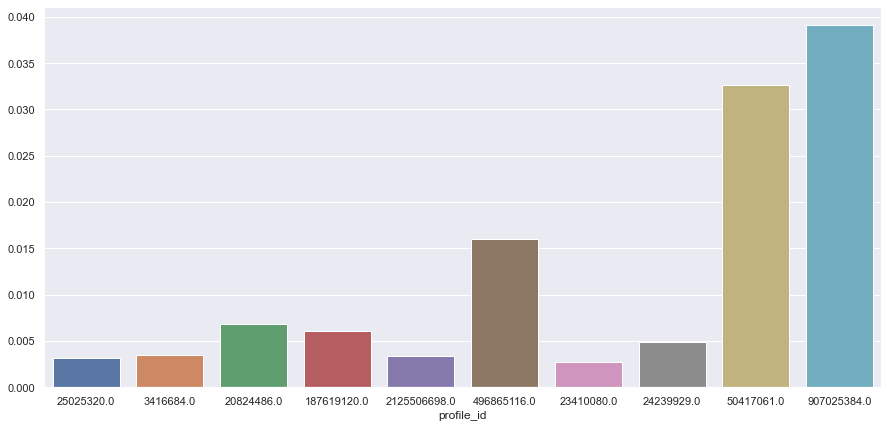

In [100]:
sns.set(rc={'figure.figsize':(15,7)})

sns.barplot(data=df_lcf, x='profile_id',y=(df_lcf['likesphoto']/df_lcf['numphoto'])/df_lcf['followers'], order=df_lcf['profile_id'])

<AxesSubplot:xlabel='profile_id'>

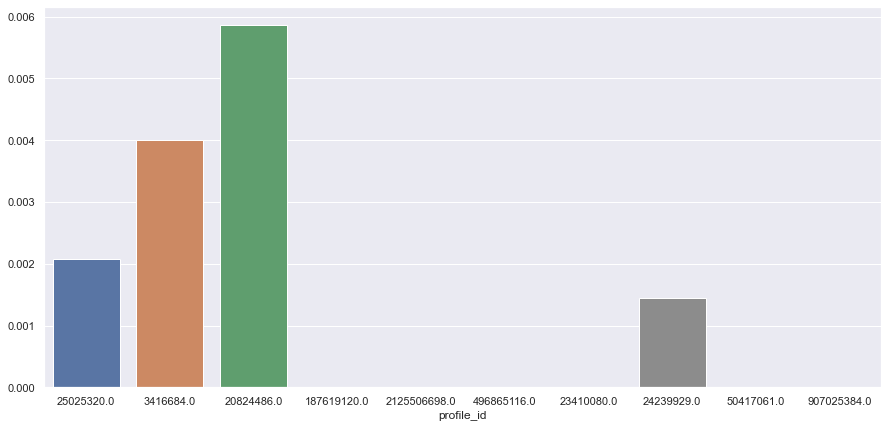

In [101]:
sns.set(rc={'figure.figsize':(15,7)})

sns.barplot(data=df_lcf, x='profile_id',y=(df_lcf['likesvideo']/df_lcf['numvideo'])/df_lcf['followers'], order=df_lcf['profile_id'])


We can see that the percentage of the average #likes with respect to the #followers is too small.

### RQ6

#### What is the average time (days and minutes) a user lets pass before publishing another post? Plot the top 3 users that publish posts more frequently (calculate the average time that passes between posts), including their amount of followers and following. Provide insights from that chart.

In [102]:
pd.options.display.float_format = '{:.0f}'.format

In [103]:
#df_locations = pd.read_csv('instagram_locations.csv', delimiter = '\t')

In [104]:
#df_profiles = pd.read_csv('instagram_profiles.csv', delimiter = '\t')

In [105]:
unique_profiles = df_profiles['profile_id'].unique()

In [106]:
# all profile ids with their followers and following
profiles_FF = df_profiles[['profile_id','followers','following']]

In [107]:
# for each post take the profile id and the time
df_prof_times = pd.read_csv('instagram_posts.csv', delimiter="\t", usecols = ['profile_id','cts'], low_memory = True)

In [108]:
# convert 'cts' to a Datetime format
df_prof_times.cts = pd.to_datetime(df_prof_times.cts)

##### What is the average time (days and minutes) a user lets pass before publishing another post? 

In [109]:
# group by the profile id and calculate the number of posts each profile has, 
# the min and the max of the feature 'cts' for each profile

df_summ = df_prof_times.groupby('profile_id').agg({'cts': ['count', 'min', 'max']})

In [110]:
df_summ.head()

cts                                        
           count                 min                 max
profile_id                                              
3             14 2010-07-19 01:12:23 2013-02-02 22:02:59
4             37 2010-07-22 12:19:51 2019-05-05 08:03:36
11             2 2019-04-18 23:21:22 2019-04-25 06:50:14
12             1 2016-10-16 05:45:18 2016-10-16 05:45:18
14             1 2015-09-19 17:20:15 2015-09-19 17:20:15

In [111]:
# remove the users that have only 1 post (we should not consider them because we cannot calculate 
# average time difference between posts given that they have only 1 post)
df_summ_1 = df_summ[df_summ['cts']['count'] != 1]

In [112]:
# calculate the average time difference between posts for each user and put the results in a new column
df_summ_1['avg_time_diff'] = (df_summ_1['cts']['max'] - df_summ_1['cts']['min']) / (df_summ_1['cts']['count'] - 1)

C:\Users\yoann\AppData\Local\Temp\ipykernel_10880\3268939585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summ_1['avg_time_diff'] = (df_summ_1['cts']['max'] - df_summ_1['cts']['min']) / (df_summ_1['cts']['count'] - 1)


In [113]:
df_summ_1

cts                                          \
               count                 min                 max   
profile_id                                                     
3                 14 2010-07-19 01:12:23 2013-02-02 22:02:59   
4                 37 2010-07-22 12:19:51 2019-05-05 08:03:36   
11                 2 2019-04-18 23:21:22 2019-04-25 06:50:14   
19                51 2010-10-23 18:48:33 2019-04-17 07:44:13   
23                 2 2015-11-19 08:57:39 2016-10-08 00:06:29   
...              ...                 ...                 ...   
15211073159        4 2019-06-21 17:52:29 2019-06-21 20:41:59   
15233295900        3 2019-06-26 23:56:47 2019-06-27 00:11:09   
15666951479       11 2019-07-29 21:36:32 2019-08-06 01:01:31   
90010129721363    10 2017-06-22 10:56:54 2018-04-04 09:53:28   
90010132543119     2 2019-04-12 21:25:36 2019-04-12 21:39:06   

                            avg_time_diff  
                                           
profile_id                                 
3              71 days 12:40:48.923076923  
4              89 days 03:12:52.916666666  
11                        6 days 07:28:52  
19                61 days 22:49:06.800000  
23                      323 days 15:08:50  
...                                   ...  
15211073159               0 days 00:56:30  
15233295900               0 days 00:07:11  
15666951479        0 days 17:08:29.900000  
90010129721363 31 days 18:32:57.111111111  
90010132543119            0 days 00:13:30  

[4354677 rows x 4 columns]

In [114]:
# sort the dataframe by the average time difference between posts
df_summ_sorted = df_summ_1.sort_values(by = 'avg_time_diff', ascending = True)

In [115]:
df_summ_sorted

cts                                              avg_time_diff
            count                 min                 max                   
profile_id                                                                  
10613906817     2 2019-06-10 22:22:10 2019-06-10 22:22:10    0 days 00:00:00
3660089901      2 2019-02-26 09:21:50 2019-02-26 09:21:50    0 days 00:00:00
2939556935      2 2016-03-04 04:23:00 2016-03-04 04:23:00    0 days 00:00:00
433611713       2 2019-05-26 22:23:40 2019-05-26 22:23:40    0 days 00:00:00
10382580129     2 2019-05-27 19:12:16 2019-05-27 19:12:16    0 days 00:00:00
...           ...                 ...                 ...                ...
4797160         2 2011-06-06 16:25:59 2019-05-06 10:44:05 2890 days 18:18:06
65800           2 2011-05-07 02:29:49 2019-05-29 07:48:53 2944 days 05:19:04
990566          2 2011-03-15 18:33:27 2019-05-05 00:35:34 2972 days 06:02:07
122455          2 2010-10-25 19:23:28 2019-04-09 03:46:35 3087 days 08:23:07
691261          2 2010-12-15 19:51:40 2019-06-02 21:26:17 3091 days 01:34:37

[4354677 rows x 4 columns]

In [116]:
# calculate the average time (days and minutes) a user lets pass before publishing another post 
print("Avg time a user lets pass before publishing another post: ", df_summ_sorted['avg_time_diff'].mean())

Avg time a user lets pass before publishing another post:  76 days 17:06:26.772431731


#####  Plot the top 3 users that publish posts more frequently (calculate the average time that passes between posts), including their amount of followers and following. Provide insights from that chart.

In [117]:
df_prof_times.shape

(42710197, 2)

In [118]:
# find the profiles that are present in both the profiles dataset and the posts dataset

# array of all unique profile_ids
ids_unique = df_profiles['profile_id'].unique()

In [119]:
# data for the profiles that are present in both the profiles and the posts datasets
df_prof_times_2 = df_prof_times[df_prof_times['profile_id'].isin(ids_unique)]
df_prof_times_2.shape

(27715738, 2)

In [120]:
df_prof_times_2.duplicated().sum()

248499

We found that some of the profiles have posts that are recorded several times in the posts dataset. (same profile id, same cts feature). We believe that a user cannot post several posts on Instagram at the same time. Therefore, we dropped the duplicated observations in the posts dataset.

In [121]:
df_prof_times_3 = df_prof_times_2.drop_duplicates()
df_prof_times_3.shape

(27467239, 2)

In [122]:
# group by the profile id and calculate the number of posts each profile has, 
# the min and the max of the feature 'cts' for each profile

time_diff_1 = df_prof_times_3.groupby('profile_id').agg({'cts': ['count', 'min', 'max']})

In [123]:
time_diff_1

cts                                        
               count                 min                 max
profile_id                                                  
4                 37 2010-07-22 12:19:51 2019-05-05 08:03:36
19                51 2010-10-23 18:48:33 2019-04-17 07:44:13
28                92 2011-02-19 20:16:29 2019-04-16 05:10:12
33                 2 2011-04-30 06:13:46 2013-03-30 22:35:38
34                20 2011-07-29 06:24:16 2019-07-01 20:49:50
...              ...                 ...                 ...
14997381946       12 2019-07-09 03:18:33 2019-07-11 04:25:20
15019176838        5 2019-06-19 13:17:00 2019-07-21 14:05:34
15233295900        3 2019-06-26 23:56:47 2019-06-27 00:11:09
15666951479       11 2019-07-29 21:36:32 2019-08-06 01:01:31
90010129721363    10 2017-06-22 10:56:54 2018-04-04 09:53:28

[2173843 rows x 3 columns]

In [124]:
# remove the users that have only 1 post (we should not consider them because we cannot calculate 
# average time difference between posts given that they have only 1 post)
time_diff_2 = time_diff_1[time_diff_1['cts']['count'] != 1]

In [125]:
# calculate the average time difference between posts for each user and put the results in a new column
time_diff_2['avg_time_diff'] = (time_diff_2['cts']['max'] - time_diff_2['cts']['min']) / (time_diff_2['cts']['count'] - 1)

C:\Users\yoann\AppData\Local\Temp\ipykernel_10880\777867357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_diff_2['avg_time_diff'] = (time_diff_2['cts']['max'] - time_diff_2['cts']['min']) / (time_diff_2['cts']['count'] - 1)


In [126]:
# sort the dataframe by the average time difference between posts
time_diff_sort = time_diff_2.sort_values(by = 'avg_time_diff', ascending = True)

In [127]:
time_diff_sort

cts                                              avg_time_diff
            count                 min                 max                   
profile_id                                                                  
6336490331      2 2017-11-05 16:09:48 2017-11-05 16:09:49    0 days 00:00:01
8278512171      2 2018-12-18 08:00:59 2018-12-18 08:01:00    0 days 00:00:01
1452167807      2 2014-08-06 16:07:38 2014-08-06 16:07:39    0 days 00:00:01
6708223857      2 2017-12-10 07:18:55 2017-12-10 07:18:56    0 days 00:00:01
11804840640     2 2019-03-10 16:11:04 2019-03-10 16:11:05    0 days 00:00:01
...           ...                 ...                 ...                ...
35054172        2 2012-04-08 12:30:39 2019-05-04 16:15:10 2582 days 03:44:31
11226500        2 2011-11-14 22:36:34 2019-04-25 02:10:52 2718 days 03:34:18
1310323         2 2011-06-26 04:09:18 2019-05-07 02:06:51 2871 days 21:57:33
2641018         2 2011-05-28 03:34:47 2019-04-23 21:34:51 2887 days 18:00:04
4797160         2 2011-06-06 16:25:59 2019-05-06 10:44:05 2890 days 18:18:06

[2033072 rows x 4 columns]

In [128]:
time_diff_sort['cts']['count'].mean()

12.290612432811036

The average number of posts that a user has posted is around 12 posts

By observing the dataframe above, we can see that there are a lot of users who have posted only 2,3,4, or 5 times and users who have posted a lot more than them. When we compare users who have the same average time difference between posts but different number of posts, the user with higher number of posts post more frequently. Therefore, we decided to look only at the users who have at least 12 posts (average # posts for a user).

In [129]:
time_diff_sort_2 = time_diff_sort[time_diff_sort['cts']['count'] >= 12]

In [130]:
time_diff_sort_2

cts                                          \
            count                 min                 max   
profile_id                                                  
10380406609    12 2019-05-18 02:10:12 2019-05-18 02:10:34   
2711364592     12 2018-08-02 15:31:18 2018-08-02 15:31:44   
391864453      12 2017-05-13 14:22:55 2017-05-13 14:23:21   
4782007773     12 2017-10-13 20:22:17 2017-10-13 20:22:44   
3471763863     12 2017-11-13 06:40:23 2017-11-13 06:40:52   
...           ...                 ...                 ...   
130382         13 2010-10-20 10:45:16 2019-05-05 09:45:03   
2705887        12 2011-04-24 17:00:28 2019-03-03 21:46:04   
2364316        12 2011-03-20 11:01:58 2019-02-05 06:32:10   
2087748        12 2011-03-08 06:58:15 2019-03-25 02:43:24   
689111         12 2010-11-15 15:44:39 2018-12-23 00:16:32   

                          avg_time_diff  
                                         
profile_id                               
10380406609             0 days 00:00:02  
2711364592    0 days 00:00:02.363636363  
391864453     0 days 00:00:02.363636363  
4782007773    0 days 00:00:02.454545454  
3471763863    0 days 00:00:02.636363636  
...                                 ...  
130382      259 days 21:54:58.916666666  
2705887     260 days 22:15:03.272727272  
2364316     261 days 17:02:44.727272727  
2087748               267 days 03:58:39  
689111      269 days 00:46:32.090909090  

[1748847 rows x 4 columns]

By looking at the table above, we can see that the top 3 users who post most frequently are the users with profile ids:

10380406609, 2711364592, 391864453

In [131]:
top3_ids = [10380406609, 2711364592, 391864453]

In [133]:
#print(profiles_FF[profiles_FF['profile_id'].isin(top3_ids)].to_markdown())
profiles_FF[profiles_FF['profile_id'].isin(top3_ids)]

,profile_id,followers,following
1936890,391864453,7,81
2907104,2711364592,27,289
3150436,10380406609,73,959


- Even though those profiles post most frequently, they seem to have a small number of followers. 
- One of them follows only 81 accounts, while the other two follow a lot more, especially the 3rd one, who follows 959 users.
- The 3rd user seems to have a lot more 'following' than 'followers'

#### Using the function you previously coded, plot the time intervals with the highest average number of “likes” and the ones with the highest average number of comments on posts.

In [134]:
# FUNCTION FROM RQ3

# A function that receives a time intervals list as a parameter and returns
# a plot with the number of posts for each given interval

def plot_posts_time(time_intervals):
    time_results = {}
    for slot in time_slots:
        result = len(df_prof_times[(df_prof_times.cts.dt.hour >= slot[0]) & (df_prof_times.cts.dt.hour <= slot[1])])
        time_results[slot] = result
    
    # create a list of strings of the time intervals
    time_intervals_str = []
    for i in time_intervals:
        time_intervals_str.append(str(i))
    
    num_posts = list(time_results.values())
    plt.bar(range(len(time_results)), num_posts, tick_label = time_intervals_str)
    plt.title('Number of posts for each time interval')
    plt.xlabel('Time intervals')
    plt.ylabel('Number of posts')
    plt.show()
    
    return(time_results)

In [135]:
#time_slots = [(6,10),(11,13),(14,16),(17,19),(20,23),(0,2),(3,5)]

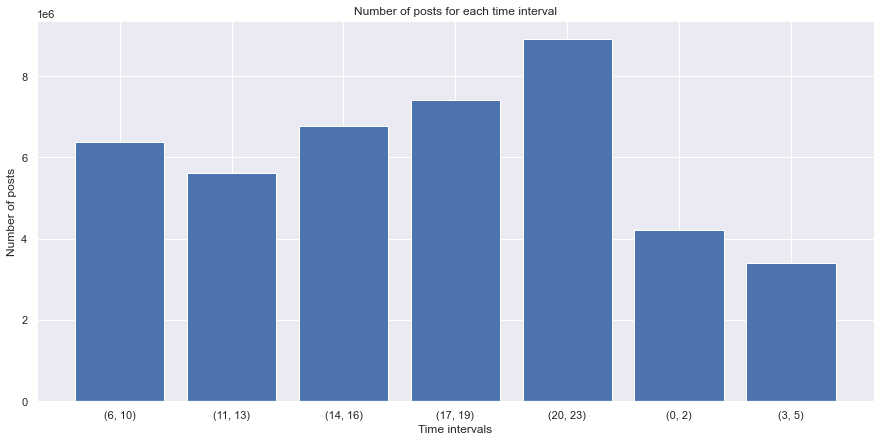

In [136]:
# total number of posts for each time interval
likes_time_int = plot_posts_time(time_slots)

In [137]:
# time intervals with the corresponding number of posts
likes_time_int

{(6, 10): 6378572,
 (11, 13): 5614715,
 (14, 16): 6763037,
 (17, 19): 7409907,
 (20, 23): 8915794,
 (0, 2): 4213617,
 (3, 5): 3411223}

In [138]:
# for each post load the cts feature, number of likes, and number of comments
df_small = pd.read_csv('instagram_posts.csv', delimiter="\t", usecols = ['cts','numbr_likes','number_comments'], low_memory = True)

In [139]:
# convert 'cts' to a Datetime format
df_small.cts = pd.to_datetime(df_small.cts)

In [140]:
# create a new column for the hours
df_small['hour'] = df_small.cts.dt.hour
df_small

,cts,numbr_likes,number_comments,hour
0,2017-08-06 20:06:57,80,0,20
1,2017-06-19 09:31:16,25,1,9
2,2017-03-11 20:05:03,9,0,20
3,2016-09-13 16:27:16,4,0,16
4,2015-10-18 10:19:27,8,0,10
...,...,...,...,...
42710192,2017-12-13 15:38:04,74,0,15
42710193,2017-10-31 11:28:01,49,0,11
42710194,2017-01-13 20:16:37,18,0,20
42710195,2019-05-20 20:07:52,27,1,20


In [141]:
# group the data by hour (hour, total #likes, total #comments, number of posts for each hour)
df_grouped = df_small.groupby('hour').agg({'numbr_likes': 'sum',
                             'number_comments': 'sum',
                             'cts': 'count'}).reset_index()
df_grouped

,hour,numbr_likes,number_comments,cts
0,0,405531147,11424195,1547036
1,1,366904343,10573403,1376147
2,2,359792815,10030327,1290434
3,3,334536136,9022103,1231644
4,4,299011417,7868252,1135290
5,5,272760213,6979884,1044289
6,6,256610815,6803716,1011923
7,7,287453647,7682144,1093280
8,8,335766798,9772560,1267423
9,9,386046074,10607873,1434724


In [146]:
# calculate the total # likes and average # comments for each of the time intervals

# empty list where we'll store the total number of likes & comments for the time intervals
# there are 7 time intervals
likes_comm = np.zeros((7,2))

for i, row in df_grouped.iterrows():
    if (6<=row['hour']) and (row['hour']<=10):
        likes_comm[0][0] += row['numbr_likes']
        likes_comm[0][1] += row['number_comments']
    elif (11<=row['hour']) and (row['hour']<=13):
        likes_comm[1][0] += row['numbr_likes']
        likes_comm[1][1] += row['number_comments']
    elif (14<=row['hour']) and (row['hour']<=16):
        likes_comm[2][0] += row['numbr_likes']
        likes_comm[2][1] += row['number_comments']
    elif (17<=row['hour']) and (row['hour']<=19):
        likes_comm[3][0] += row['numbr_likes']
        likes_comm[3][1] += row['number_comments']
    elif (20<=row['hour']) and (row['hour']<=23):
        likes_comm[4][0] += row['numbr_likes']
        likes_comm[4][1] += row['number_comments']
    elif (0<=row['hour']) and (row['hour']<=2):
        likes_comm[5][0] += row['numbr_likes']
        likes_comm[5][1] += row['number_comments']
    else:
        likes_comm[6][0] += row['numbr_likes']
        likes_comm[6][1] += row['number_comments']


In [147]:
# create a dataframe with each row corresponding to one time interval

df_avg = pd.DataFrame(likes_comm, columns=['sum_likes','sum_comm'])
df_avg['time_int'] = [k for k,v in likes_time_int.items()]
df_avg['numb_posts'] = [v for k,v in likes_time_int.items()]
df_avg

,sum_likes,sum_comm,time_int,numb_posts
0,1714755026,46784338,"(6, 10)",6378572
1,1655934971,43755376,"(11, 13)",5614715
2,2008428995,52081094,"(14, 16)",6763037
3,2228425199,59538096,"(17, 19)",7409907
4,2461097190,66302700,"(20, 23)",8915794
5,1132228305,32027925,"(0, 2)",4213617
6,906307766,23870239,"(3, 5)",3411223


In [148]:
pd.options.display.float_format = '{:.3f}'.format

In [149]:
# calculate the average number of likes and comments for each time interval
df_avg['avg_likes'] = df_avg['sum_likes'] / df_avg['numb_posts']
df_avg['avg_comm'] = df_avg['sum_comm'] / df_avg['numb_posts']
df_avg

,sum_likes,sum_comm,time_int,numb_posts,avg_likes,avg_comm
0,1714755026.000,46784338.000,"(6, 10)",6378572,268.831,7.335
1,1655934971.000,43755376.000,"(11, 13)",5614715,294.928,7.793
2,2008428995.000,52081094.000,"(14, 16)",6763037,296.971,7.701
3,2228425199.000,59538096.000,"(17, 19)",7409907,300.736,8.035
4,2461097190.000,66302700.000,"(20, 23)",8915794,276.038,7.437
5,1132228305.000,32027925.000,"(0, 2)",4213617,268.707,7.601
6,906307766.000,23870239.000,"(3, 5)",3411223,265.684,6.998


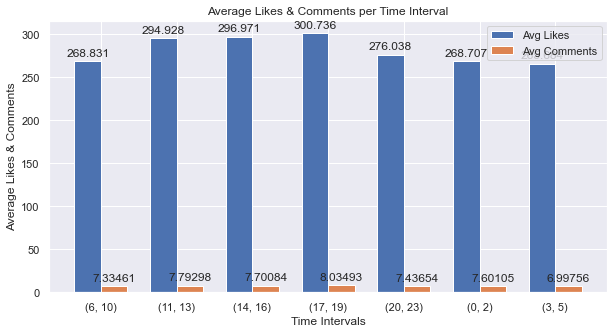

In [150]:
# plot the average likes and comments for each time interval
labels = df_avg['time_int']

x = np.arange(df_avg.shape[0])  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 5))

# plot the avg # likes
h1 = ax.bar(x - width/2, df_avg['avg_likes'], width, label = 'Avg Likes')

# plot the avg # comments
h2 = ax.bar(x + width/2, df_avg['avg_comm'], width, label = 'Avg Comments')

ax.set_xticks(x, labels)

ax.set_title('Average Likes & Comments per Time Interval')
ax.set_xlabel('Time Intervals')
ax.set_ylabel('Average Likes & Comments')

ax.bar_label(h1, padding=3)
ax.bar_label(h2, padding=3)

ax.legend()

plt.show()

The time interval with highest average number of likes is (17,19).

The time interval with highest average number of comments is the same time interval (17,19).

# RQ 7

#### What's the probability that a post receives more than 20% "likes" of the number of followers a user has?


In [151]:
num_fol = pd.read_csv('instagram_profiles.csv', delimiter='\t', usecols=['profile_id','followers'], low_memory=True)

In [152]:
num_fol = num_fol[num_fol['profile_id'].notna() & num_fol['followers'].notna()] # remove the NAs
num_fol = num_fol.drop_duplicates(keep='first')  #remove the duplicates
num_fol['profile_id'] = num_fol['profile_id'].astype('int64')   # reduce used memory 

In [153]:
# there are 27 profile_id duplicates!!!
num_fol['profile_id'].duplicated().sum()

27

In [154]:
num_fol.head()

,profile_id,followers
0,4721049632,146.000
1,590583002,1145.000
2,1074146658,324.000
5,145064167,192.000
6,2061867521,4137.000


27 in 3447151 accounts could be negligible. So, we decided to keep the duplicates.

Duplicates might come from the fact that a person has deleted his/her account and another person created a new account that has the same id.

In [155]:
from tqdm import tqdm

som = 0
for chunk in tqdm(pd.read_csv('instagram_posts.csv', delimiter='\t', usecols=['profile_id','numbr_likes'], low_memory=True, chunksize=300000)):
    chunk = chunk[chunk['profile_id'].notna() & chunk['numbr_likes'].notna()] # remove na
    a = chunk.merge(num_fol,right_on='profile_id',left_on='profile_id')       # merge the dataframe num_fol with current chunk 
    som += a[a['followers']/5 < a['numbr_likes']]['profile_id'].count()                     # count posts for which likes > 20% user's followers

143it [04:38,  1.95s/it]


In [156]:
som

3882567

In [157]:
# shape[0] gives us the total number of posts
post = pd.read_csv('instagram_posts.csv', delimiter='\t', usecols=['post_id'], low_memory=True)

In [158]:
# to calculate the probability we take the number of posts that have > 20% likes of the number of followers
# and divide by the total number of posts

print('The probab. that a post receives > 20% "likes" of the #followers a user has: ', som/post.shape[0])

The probab. that a post receives > 20% "likes" of the #followers a user has:  0.09090491902905529


#### Do users usually return to locations? Extract the probability that a user returns to a site after having posted it in the past. Does that probability make sense to you? Explain why or why not.

In [159]:
df_proloc = pd.read_csv('instagram_posts.csv', delimiter='\t', usecols=['profile_id', 'location_id'], low_memory=True)

In [160]:
df_proloc = df_proloc[df_proloc['profile_id'].notna() & df_proloc['location_id'].notna()] # remove na

In [161]:
df_proloc[df_proloc.duplicated()]['profile_id'].drop_duplicates(keep='first') # cerco quanti in proloc hanno duplicati, 
                                                                              # poi conto solo i profile_id diversi: sono 2190057
                                                                              # quindi 2190057 profili_id sono 
                                                                              # tornati in un posto già visitato:
                                                                              # ora basta fare 2190057/(tot_profili_id)

21         8492416500.000
46          176274494.000
50         1012018282.000
60           46330013.000
105        2359183323.000
                ...      
42710097   8944852162.000
42710121   1270982581.000
42710136   7618508812.000
42710154   9184891156.000
42710169   5671250088.000
Name: profile_id, Length: 2190057, dtype: float64

There are users who return to locations that they have already visited.

We count the number of duplicates in the posts dataset based on proile id and location id. Then we count the number of different profile ids: there are 2190057 unique profile ids (in the duplicated observations). This means that 2190057 profiles_id have returned to a previously visited place.

To find the probability we divide the number of unique ids 2190057 by the total number of profiles that have visited a location more than once (tot_profil_id)

In [163]:
pd.options.display.float_format = '{:.6f}'.format

In [164]:
2190057/(df_proloc['profile_id'].drop_duplicates(keep='first'))

0          0.000979
1          0.000393
2          0.006987
3          0.001192
4          0.001935
             ...   
42710186   0.000394
42710190   0.000312
42710191   0.000318
42710192   0.000394
42710194   0.000666
Name: profile_id, Length: 11331493, dtype: float64

This probability may not make sense because a lot of people tend to post at their homes or in their offices several times. 

In this case we are more interested if the users have visited some place and have returned to it. Instead, here, we also count the number of times a user has posted for example from home.

# RQ 8

In [165]:
import seaborn as sns
from scipy import stats
from statistics import mode

from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

#### Does more “likes” also mean more comments? Plot a scatter plot of “likes” vs comments for posts.

In [166]:
post=pd.read_csv('instagram_posts.csv', delimiter='\t', usecols=['numbr_likes','number_comments'], low_memory=True)

In [167]:
post1 = post.copy()

In [168]:
#We use logaritmic scale for a meaningful plot
post['numbr_likes'] = post['numbr_likes'].apply(lambda x: np.log(x+1))


In [169]:
post

,numbr_likes,number_comments
0,4.394449,0.000000
1,3.258097,1.000000
2,2.302585,0.000000
3,1.609438,0.000000
4,2.197225,0.000000
...,...,...
42710192,4.317488,0.000000
42710193,3.912023,0.000000
42710194,2.944439,0.000000
42710195,3.332205,1.000000


In [170]:
# take only the posts that have a value for number of likes and comments
post = post[post['numbr_likes'].notna() & post['number_comments'].notna()]

<AxesSubplot:xlabel='numbr_likes', ylabel='number_comments'>

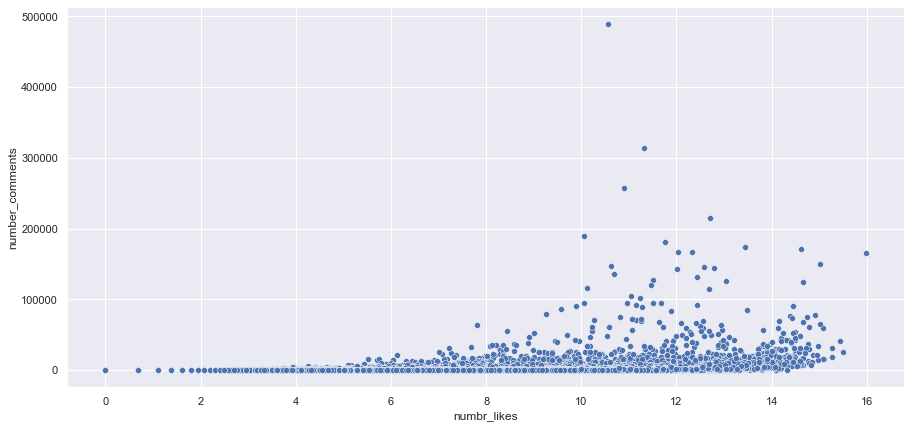

In [171]:
sns.scatterplot(data=post, x='numbr_likes', y='number_comments')

We can see that as the number of likes increases the number of comments also tend to increase.

#### Can you find any significant relationship between the time a user publishes a post and the number of comments and “likes”?  Use an appropriate statistical test or technique and support your choice.

In [172]:
import scipy

In [173]:
df_tlc = pd.read_csv('instagram_posts.csv', delimiter='\t', usecols=['numbr_likes','number_comments','cts'], low_memory=True)

In [174]:
# drop observations with missing values
df_tlc = df_tlc[df_tlc['numbr_likes'].notna() & df_tlc['number_comments'].notna() & df_tlc['cts'].notna()]

In [175]:
df_tlc['numbr_likes'] = df_tlc['numbr_likes'].astype('int32')
df_tlc['number_comments'] = df_tlc['number_comments'].astype('int32')
df_tlc.cts = pd.to_datetime(df_tlc.cts)

In [176]:
# calculate the Pearson correlation
scipy.stats.pearsonr(df_tlc.cts.dt.hour, df_tlc['numbr_likes']) #(pearson coef. , p-value)

(0.001153675463218047, 4.72399662013337e-14)

In [177]:
scipy.stats.pearsonr(df_tlc.cts.dt.hour, df_tlc['number_comments']) #(pearson coef. , p-value)

(0.0005060504676036676, 0.0009427911225358622)

We use a function that gives us the Pearson's coefficient and the p-value. In both cases, the Pearson's coef. is near 0. The p-value is less than 0.05 which means that the Pearson coeff. is statistically significant. Therefore, we can trust the Pearson coefficient and conclude that there is no relationship between the number of likes and the time the post was published and between the number of comments and the time the post was published.

#### What’s the distribution of followers? Plot the empirical distribution of followers amongst all users and extract the mean, mode, and quantiles. Interpret those figures.

In [178]:
fol = pd.read_csv('instagram_profiles.csv', delimiter='\t', usecols=['profile_id','followers'], low_memory=True)
fol = fol.drop_duplicates(keep='first')
fol = fol[fol['followers'].notna()]


In [179]:
fol['followers'] = fol['followers'].astype('int32')

In [180]:
fol.shape

(3448803, 2)

In [181]:
foll = (fol['followers']+1).copy() / fol['followers'].sum()

<AxesSubplot:xlabel='followers', ylabel='Count'>

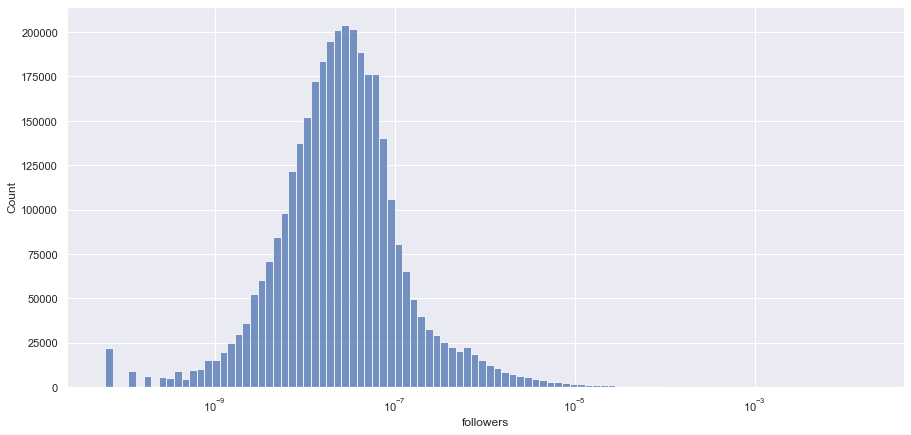

In [182]:
sns.histplot(data=foll,bins=100, log_scale=10)

##### Mean

In [183]:
np.mean(fol['followers'])

4744.477709512546

##### Mode

In [184]:
mode(fol['followers'])

0

In [185]:
fol['followers'].value_counts().sort_values(ascending=False).head()

0     22017
1      9040
50     6548
49     6455
51     6370
Name: followers, dtype: int64

##### Quantiles

In [186]:
a = np.quantile(fol['followers'], np.linspace(0,0.98,100))

<AxesSubplot:>

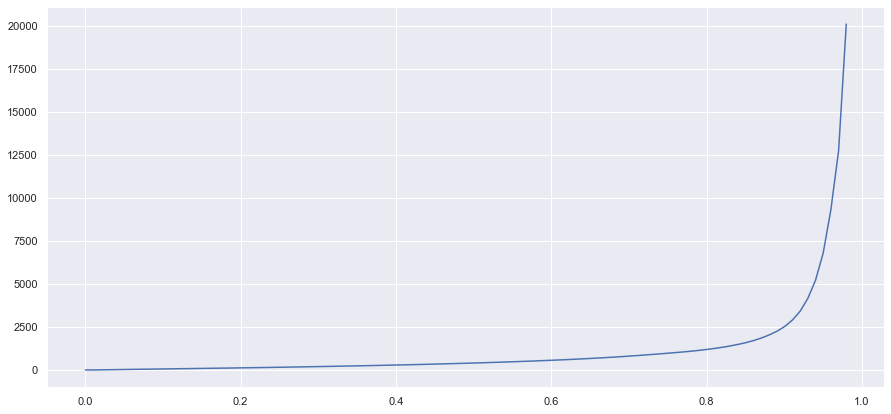

In [187]:
sns.lineplot(x=np.linspace(0,0.98,100), y=a)

As we can see the quantile function grows very fast because 98% of the users have less than 20000 followers and there are only a few users with more followers.

#### What are histograms, bar plots, scatterplots and pie charts used for?

* A **histogram** is a grah used to represent the frequency distribution of some data points of a variable. For example, histogram  could represent student test scores. Student scores are classified into different ranges. The height of each bar represents the number of students who scored in that range.

* A **bar plot** is a chart/graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. Categorical data is a grouping of data into discrete groups, such as months of the year, age group, shoe sizes, and animals. These categories are usually qualitative. Bar charts have a discrete domain of categories.

* A **scatterplot** is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. It could be used to measure the correlation between two variables. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

* A **pie chart** has the same use of a bar plot: it represents categorical data with a circular statistical graphic, which is divided into slices to illustrate numerical proportion.

#### What insights can you extract from a Box Plot?

A boxplot provides a visual summary of the data enabling researchers to quickly identify mean values, outliers, the dispersion of the data set, and signs of skewness. It gives a complete image of the probability.

It contains the minimum, first quartile, median, third quartile, and maximum.

# Bonus Question

In [ ]:
import math
import seaborn as sns
from collections import defaultdict
import datetime

#### a. Sort the users in terms of number of followers and divide them into two groups: for the first group, take only the top 10% regarding "followers", and for the second one, take the rest. Now compare the mean of time intervals between posts for the two categories. Do you notice something relevant?

In [188]:
DF_profiles=pd.read_csv('instagram_profiles.csv', delimiter='\t',usecols = ['profile_id','followers'],low_memory=True)

In [189]:
DF_posts=pd.read_csv('instagram_posts.csv', delimiter='\t',usecols = ['profile_id','cts'],low_memory=True)
DF_posts.cts = pd.to_datetime(DF_posts.cts)

In [192]:
DF_profiles_sorted = DF_profiles.sort_values(by='followers', ascending = False) #Sorting the dataframe by 'followers' col
DF_profiles_sorted_10=DF_profiles_sorted.head(int(np.ceil(0.1*DF_profiles.shape[0]))) #From the sorted dataframe we take only the top 10%
DF_profiles_90=DF_profiles.drop(DF_profiles_sorted_10.index) #From the main dataframe we drop we index of users in the 10%

In [193]:
#From instangram_posts.csv dividing the users in top 10% and not in 10%
ids_unique_10 = DF_profiles_sorted_10['profile_id'].unique()
ids_unique_90=DF_profiles_90['profile_id'].unique()
DF_average_times_10 = DF_posts[DF_posts['profile_id'].isin(ids_unique_10)]
DF_average_times_90=DF_posts[DF_posts['profile_id'].isin(ids_unique_90)]

In [194]:
#Dropping NaT results
DF_average_times_10=DF_average_times_10.dropna()
DF_average_times_90=DF_average_times_90.dropna()


In [195]:
#Computing the averages times between posts in the top 10%, and not top 10%, datasets 
Average_10=(DF_average_times_10['cts'].max()-DF_average_times_10['cts'].min())/(DF_average_times_10.shape[0]-1)
Average_90=(DF_average_times_90['cts'].max()-DF_average_times_90['cts'].min())/(DF_average_times_90.shape[0]-1)

In [196]:
print('Averages times in the top 10% (1st group) users is:',Average_10)
print('Averages times for the rest (2nd group):',Average_90)

Averages times in the top 10% (1st group) users is: 0 days 00:00:56.089334402
Averages times for the rest (2nd group): 0 days 00:00:14.019993790


The number of users in the 2nd group is 9 times more than the number of people in the 1st group. Therefore, we expect the average time between posts of the 2nd group to be 9 times less than the average time between posts of the 1st group.

For example, if group 1 has only 1 user and group 2 has 9 users, we can expect the mean time between the posts of the 2nd group to be 9 times smaller than the mean time between posts of group 1.

From the averages computed above, we can see that the 1st group has an average time of 56 seconds and the 2nd group has an average time of 14 seconds. We can see that the mean time of the bigger group (the 2nd one) is 4 times less than the average time between posts of the 1st group not 9 times less. Therefore, the 1st group posts more often than the 2nd one.


The 2nd group post more (more number of posts) in absolute value. However, they post less often proportionally to the 1st group.

#### b. Assume users publish their posts the same day pictures or videos are taken: Are there users that have visited the same location on the same day? How about the same week? Extract the results and explain them.

In [197]:
df_posts=pd.read_csv('instagram_posts.csv', delimiter='\t',usecols = ['profile_id','location_id','cts'],low_memory=True)

In [198]:
df_posts.cts = pd.to_datetime(df_posts.cts)

In [199]:
df_posts['day']=df_posts.cts.dt.date

In [200]:
df_posts_1=df_posts[['profile_id','location_id','day']]

In [201]:
df_posts_1=df_posts_1.drop_duplicates()

In [202]:
df_posts_1=df_posts_1[['location_id','day']]

In [203]:
df_posts_1.duplicated().sum()

17178169

Because there are duplicates there are users that have posts in the same location on the same day. Those are around 17 milion

In [204]:
df_posts.head()

,profile_id,location_id,cts,day
0,2237947779.000000,1022366247837915.000000,2017-08-06 20:06:57,2017-08-06
1,5579335020.000000,457426771112991.000000,2017-06-19 09:31:16,2017-06-19
2,313429634.000000,457426771112991.000000,2017-03-11 20:05:03,2017-03-11
3,1837592700.000000,457426771112991.000000,2016-09-13 16:27:16,2016-09-13
4,1131527143.000000,457426771112991.000000,2015-10-18 10:19:27,2015-10-18


In [205]:
df_posts['week']= df_posts.cts.dt.isocalendar().week
df_posts['year']= df_posts.cts.dt.year

In [206]:
df_posts.head()

,profile_id,location_id,cts,day,week,year
0,2237947779.000000,1022366247837915.000000,2017-08-06 20:06:57,2017-08-06,31,2017.000000
1,5579335020.000000,457426771112991.000000,2017-06-19 09:31:16,2017-06-19,25,2017.000000
2,313429634.000000,457426771112991.000000,2017-03-11 20:05:03,2017-03-11,10,2017.000000
3,1837592700.000000,457426771112991.000000,2016-09-13 16:27:16,2016-09-13,37,2016.000000
4,1131527143.000000,457426771112991.000000,2015-10-18 10:19:27,2015-10-18,42,2015.000000


In [207]:
df_posts_2 = df_posts[['profile_id','location_id','year', 'week']]

In [208]:
df_posts_2 = df_posts_2.drop_duplicates()

In [209]:
df_posts_3 = df_posts_2[['location_id','year', 'week']]

In [210]:
df_posts_3.duplicated().sum()

19356240

Doing the same things as before we can say that there are users that have visited the same location in the same week

#### c. Implement a text data analysis (also known as text mining) of the field "description" from instagram_posts.csv for descriptions written in English. Use appropriate visualizations and statistics to highlight the words (and probably the topics) provided for the users in that field.

In [211]:
!pip install langdetect
from langdetect import detect
import collections

  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=8dd580396a463737f8d33ce33cedf3c3e0058a6958e686d90633c01d2aafdf20
  Stored in directory: c:\users\yoann\appdata\local\pip\cache\wheels\d1\c1\d9\7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect


In [212]:
from langdetect import detect
import collections
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yoann\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [213]:
stop_words = stopwords.words('english')

In [214]:
#We get some constraints on the number of rows just to make it fast
chunksize = 10**3
rows=10**5
df_detect = pd.DataFrame()
for chunk in pd.read_csv('instagram_posts.csv', delimiter="\t", usecols = ['description'], low_memory = True,nrows=rows, chunksize=chunksize):

    if detect(str(chunk['description']))=='en':
        df_detect = pd.concat([df_detect, chunk], ignore_index=True, ) 
        
df_detect=df_detect.dropna() 
df_detect['description'] = df_detect['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
r1 = df_detect['description']
w=dict(collections.Counter([y for x in r1.values.flatten() for y in x.split()])) 

In [215]:
#Since the detect function have a high rate of error we have to clean a bit the dict
w_keys=list(w.keys())
L=len(w_keys)
En_alpha=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
for i in range(L):
    if w_keys[i].isalpha() and w_keys[i][0] in En_alpha:
        0
    else:
        w.pop(w_keys[i],0) 
newL=len(list(w.keys()))
L-newL #number of undetected words that we have cleaned from our dict
#even if we cleaned the dict we may find some words that are not english!

339171

In [216]:
#creating a DataFrame to apply easly some constraints on the words
DF_w=pd.DataFrame.from_dict(w,orient='index',columns=['repetitions'])
DF_w=DF_w.sort_values(by = 'repetitions', ascending = False)

In [217]:
#dropping values that might be meaningless (usually the words that appear very often and the one that appears very few times) 
M=0.03
m=0.001
DF_w=DF_w.drop(DF_w[(DF_w.repetitions>(M*DF_w.shape[0])) | (DF_w.repetitions<(m*DF_w.shape[0]))].index)

In [218]:
#We have now some keywords
DF_w.tail(50)

,repetitions
vibes,82
tan,81
cho,81
của,81
amor,81
Los,81
City,81
fabulous,81
due,81
Still,81


# Algorithmic Question

# AQ 1

In [219]:
'''Input: 
    N : an integer 
    List : array of characters of length N without repetition
    
function f1(sequence, end): 
    For i=0 To end:
        OUTPUT sequence[i]
    EndFor
    Output "\n"
    
function f2(sequence, start, end): 
    If start = end: 
        f1(sequence, end)
    Else
        For i=start To end: 
            temp <-- sequence[start]
            sequence[start] <-- sequence[i]
            sequence[i] <-- temp
            f2(sequence, start+1, end)
            temp <-- sequence[start]
            sequence[start] <-- sequence[i]
            sequence[i] <-- temp
f2(List, 0, N) '''

'Input: \n    N : an integer \n    List : array of characters of length N without repetition\n    \nfunction f1(sequence, end): \n    For i=0 To end:\n        OUTPUT sequence[i]\n    EndFor\n    Output "\n"\n    \nfunction f2(sequence, start, end): \n    If start = end: \n        f1(sequence, end)\n    Else\n        For i=start To end: \n            temp <-- sequence[start]\n            sequence[start] <-- sequence[i]\n            sequence[i] <-- temp\n            f2(sequence, start+1, end)\n            temp <-- sequence[start]\n            sequence[start] <-- sequence[i]\n            sequence[i] <-- temp\nf2(List, 0, N) '

#### What is the output of this algorithm? Describe the mechanism of the algorithm in detail . We do not want to know only its final result. (Describe one example on your own)

This algorithm aims to permute a sequence of length N.
Using for example the sequence 0,1,2 starting from 0 and ending to 3, the "temp" stores the value seq[0] (our starting point), in the second iteration the f2 function takes in input the same sequence but starting+1 point and the same ending point in this case the first element of the sequence become seq[1] 

(1), in the next iteration the first element of the sequence become seq[2]

(2). At this point the start == end and the f1 print the first sequence (0,1,2). in this way we continue this recursive algorithm using temporary variable until compute the first permutation (0,2,1) and so on.

In [38]:

def f1(seq,end):
    for i in range(end):
        print(seq[i])        
    return(print('\n'))
                 
def f2(sequence, start, end):
    if start == end:
        f1(seq,end)
    else:
        for i in range(start,end):
            temp = sequence[start]
            sequence[start] = sequence[i]
            sequence[i] = temp
            f2(sequence, start+1, end)
            temp = sequence[start] 
            sequence[start] = sequence[i]
            sequence[i] = temp
           
N=3
seq=[i for i in range(N)]
f2(seq,0,N)


0
1
2


0
2
1


1
0
2


1
2
0


2
1
0


2
0
1




#### What is asymptotically (i.e., we are asking for big-O complexity) the algorithm's running time as a function of N?

f1 have complexity N since it only prints the sequence elementwise,but f2 is a recursive algorithm and have a running time of:
$$T(N)=N(K+T(N-1))=N(K+(N-1)(K+T(N-2))=....=\sum_{i=i}^{N}\frac{N!}{(N-i)!}k+N!T(0)$$

Where T(0) has the complexity of f1 which is N, so the big-O complexity is $\Theta(NN!)$ which is extremely expansive.




#### Is this algorithm the optimal one to produce this output? If not, can you suggest a better algorithm to perform the same task?

Since the number of permutations for a sequence of N element is N!, an algorithm has to compute at least N! operations.

# AQ 2

#### Implement a recursive algorithm to help Alex find the maximum possible value after multiplying the length of the pieces. Explain your algorithm in detail.

In [83]:
def MUL(k,D=0):   
    A=(k//2)*((k+1)//2) #calculate the max product with only one cut 
    D=max(D,k,A)        #the max of the previous max and the product of one cut (we add 'k' because if k=3, k>A=2)
    for i in range(1,(k+1)//2): 
        D=max(D,MUL(i,0)*MUL(k-i,0))  # in this line we recall the function
    return D  

def ribbon_exp(n):
    if n in [2,3]:    # we have to esclude the case n=2,3 
        return n-1
    else:
        return MUL(n,0)
ribbon_exp(25)

8748

#### Show that the algorithm has exponential running time.

$T(k)=\sum_{i=1}^k T(i)+T(k-i)$

$\sum_{i=1}^k C+ T(k-i)\le T(k)$, we minimize $T(i)$ with $T(0)$, that is costant. 

First we evaluete the cost of $\sum_{i=1}^k T(k-i)$

$T(k)=\sum_{i=1}^{k} T(k-i)=T(k-1)+\dots+T(0)$

$\sum_{i=1}^k T(k-i)=T(k)+T(k-1)+\dots+T(0)=T(k)+\sum_{i=1}^{k-1} T(k-i)=2 \sum_{i=1}^{k-1} T(k-i)=2(2\sum_{i=1}^{k-2} T(k-i))=\dots=2^kT(0)$

This is an exponential cost.


#### Now provide a polynomial solution, based on dynamic programming, and compute its running-time complexity.

In [84]:
import numpy as np
def ribbon_pol(N):
    p=[1]
    if N==1:
        return 1
    M=[0]
    for i in range(2,N+1):
       
        I=i-1
        P=int(np.floor(i/2)*(np.floor(i/2)+i%2))
        p.append(P)
        k=1
        j=0
        while k!=I:
            if p[I-k]*k<=p[I]:
                k+=1
            elif p[I-k]*k>p[I]:
                M.append(p[I-k]*k)
                k+=1
        if len(M)>1:
            
            p[I]=max(M)
            M=[0]
    return p[N-1]

ribbon_pol(25)
              

8748

This algorithm have complexity $$T(N)=(N-1)(k+Nj)=N(k-j)+N^2j-k \hspace{1cm} \text{where k,j are constants}$$

So we have that the big-O complexity is $\Theta (N^2)$.

#### Evaluate the running time of your algorithm for the sizes (Ns) in the range of [2, 25], plot the results, and interpret it (if you have implemented two algorithms, please include both in the plot and compare them).

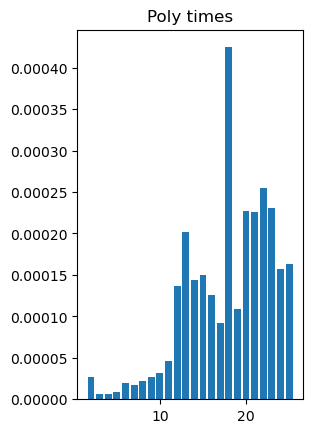

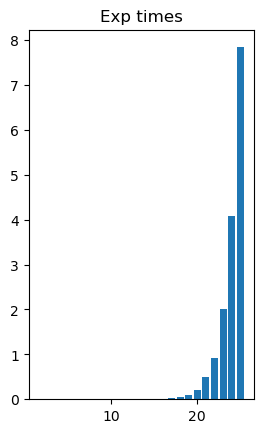

In [103]:
import timeit
import matplotlib.pyplot as plt
Ns= np.arange(2,26)
time_pol=[]
time_exp=[]

for i in range(Ns.shape[0]):
    start = timeit.default_timer()
    ribbon_pol(int(Ns[i]))
    stop = timeit.default_timer()
    t=stop-start
    time_pol.append(t)
    
    Start = timeit.default_timer()
    ribbon_exp(int(Ns[i]))
    Stop = timeit.default_timer()
    T=Stop-Start
    time_exp.append(T)

plt.subplot(121)
plt.title('Poly times')
plt.bar(Ns,time_pol)
plt.show()
plt.subplot(122)
plt.title('Exp times')
plt.bar(Ns,time_exp)
plt.show()


Looking at the plots we can easily see a polynomial graphic and an exponential one.

Times magnitude are really different, for the poly one we have around milliseconds rather then seconds,like  in the exponential one.

#### (Optional, mini bonus) Is the algorithm of question 3 optimal? If you belive it, can you prove it? If not, can you find a faster algorithm? In case you found a faster algorithm implement it and explain your algorithm in detail.

If we divide the ribbon of length N into (N/M)*M pieces, the product would be $M^{(N/M)}$ and considering it as a continous problem we could compute the derivative and find the roots of it, doing so we would find the number $e$ and since the closer integer are 2 and 3, we should divide the ribbon into 2 or 3 chunkies; reiterating it and considering some examples like 10=5+5=(3+2)+(3+2)=3+3+4, we notice that we have to add as many 3 as needed to have the last number being in {4,3,2} so rethinking this problem into a mod problem we reach the following algorithm that has constant running time.

In [105]:
import numpy as np
def ribbon(N):
    i=N%3
    if i==0:
        return int((3**(N/3)))
    if i==1:
        return int((3**(np.floor(N/3)-1)*4))
    if i==2:
        return int((3**(np.floor(N/3))*2))
print(ribbon(8))


18


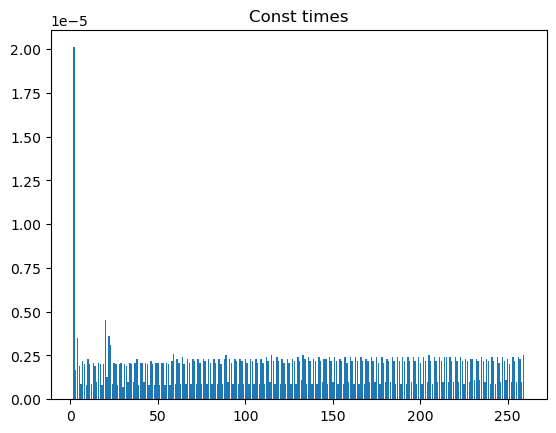

In [110]:
import matplotlib.pyplot as plt

Ns= np.arange(2,260)
time_const=[]

for i in range(Ns.shape[0]):
    start = timeit.default_timer()
    ribbon(int(Ns[i]))
    stop = timeit.default_timer()
    t=stop-start
    time_const.append(t)



plt.title('Const times')
plt.bar(Ns,time_const)
plt.show()



As we can see in the plot, the running time is constant